<div style="text-align: center;">
    <h1><strong>Physics 129L Final Project: Investigating the Outflow Dynamics of Active Galactic Nuclei through Computational Simulations</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>AGN Galaxy Simulation</strong></h3>
</div>
My goal of this project is to study the outflow dynamics of Active Galactic Nucleis (AGNs) since it is crucial for comprehending their roles in galaxy formation and evolution and aims to simulate the outflow properties of AGNs using computational techniques to understand their process and implications for galaxy evolution. 

However, before starting analyzing the properties of AGN, we need some sample of AGN host galaxies to start with, and this is one of the most complex process since there are too many things to be considered. We start by considering some most important factors of AGN host galaxies in the simulation:

1. **Modeling the Black Holes**: Simulating the behavior of supermassive black holes at the centers of these galaxies, including their mass, spin, and accretion rates.
2. **Modeling the Gas Dynamics**: Modeling the accretion of gas onto the black hole and the resulting jets and winds.
3. **Consider the Galactic Interactions**: Considering the gravitational interactions between galaxies, especially in dense environments like galaxy clusters.
4. **Consider the Feedback Processes**: Including the effects of the AGN on its host galaxy, like outflows that can heat up or expel gas, affecting star formation.
5. **Consider the Fact that it is a Part of Our Universe (Cosmological Context)**: Placing these galaxies within the larger structure of the universe, considering the expansion of the universe, dark matter distribution, and the cosmic web.
6. **Include the Radiation Processes**: Simulating the radiation emitted by the AGN, which includes a wide spectrum from radio to gamma rays.

I think the best way to simulate such galaxies is to create a galaxy class and define these above properties seperately. So the first step is to initiate a class called galaxy with basic parameters.


In [44]:
# First, import useful packages (subject to change, will be adding all the packages here when needed)
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import corner
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize
from astropy import units as u



In [9]:
# Second, define some constant 
# (unit included by using the astropy package units)
'''Gravitational constant'''
G = 6.67430e-11 * u.m**3 / u.kg / u.s**2
'''speed of light'''
c = 299792458 * u.m / u.s
'''number of galaxies to be simulated'''
num_galaxies = 1000
'''time steps'''
time_steps = 100

In [10]:
# Now we can start by defining a class of galaxy, and think about the structure of this class
class Galaxy:
    # initialize the galaxy
    def __init__(self, mass, position, velocity, black_hole_mass):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.black_hole_mass = black_hole_mass
    
    # black hole accretion model
    def accretion_model(black_hole_mass):
        '''
        This will be an impliment or accresion model for black hole accretion and feedback
        This should return accretion_rate, radiation, jets
        '''
        pass
    
    # Gas Dynamics and Interstellar Medium
    def gas_dynamics(galaxy):
        '''
        This models the impliment model of the dynamics of gas in and around the galaxies
        The processes like cooling, heating, and interaction with AGN radiation should be considered
        '''
        pass
    
    # Galaxy Interaction and Dynamics
    def update_galaxy_dynamics(galaxies):
        '''
        Implement gravitational interactions between galaxies.
        Update positions and velocities based on gravitational forces.
        '''
        pass
    

## A) Accretion Model
The accretion model also contains many parts:

1. accretion rate
2. radiation
3. jet production

I will do these step by step by using and analyzing the equations that describe each model

### 1. Accretion Rate
The accretion rate of a black hole often depends on the **mass of the black hole**, the **density of the surrounding medium**, and the **velocity at which this medium is moving relative to the black hole**. 

I here use the Bondi-Hoyle-Lyttleton accretion rate model: (https://en.wikipedia.org/wiki/Bondi_accretion)
$$
\dot{M} = \pi \left( \frac{2 G^2 M^2 \rho_\infty}{(v_\infty^2 + c_s^2)^{3/2}} \right)
$$
\begin{align}
\dot{M} & : \text{Accretion rate} \\
G & : \text{Gravitational constant} \\
M & : \text{Mass of the accreting object} \\
\rho_\infty & : \text{Density of the ambient medium (far from the accreting object)} \\
v_\infty & : \text{Relative velocity between the object and the ambient medium} \\
c_s & : \text{Sound speed of the ambient medium}
\end{align}

Since I am working with AGN host galaxies, some of the parameters including $\rho_\infty$, $v_\infty$, and $c_s$ are constrained. However, they are also kind of randomized within the range. 

I was thinking if I should use a constant or use a randomization function. However, since the blackhole mass are already an input, I will keep these three fixed first. Later on, I can also test how these values impact the output accretion rate solar masses per year. I made the default values $\rho_\infty = 10^{-13} kg/m^3$, $v_\infty = 5 \times 10^7 m/s$, and $c_s = 5 \times 10^5 m/s$ just to start with.

In [11]:
# based on this, we can define a accretion rate function called calculate_accretion_rate that 
# returns the accretion rate solar masses per year
def calculate_accretion_rate(black_hole_mass, 
                             rho = np.random.uniform(1e-14, 1e-13), 
                             v = np.random.uniform(4.5e7, 5.5e7), 
                             c_s = np.random.uniform(1e4, 2e6)):
    '''
    The input black hole mass should in the unit of solar mass
    $\rho_\infty = 10^{-13} kg/m^3$, $v_\infty = 5 \times 10^7 m/s$, and $c_s = 5 \times 10^7 m/s$
    '''

    G = 6.67430e-11 * u.m**3 / u.kg / u.s**2 # gravitational constant with u.m**3 / u.kg / u.s**2
    M = black_hole_mass * 1.98847e30 * u.kg  # solar masses to kg

    rho = rho * u.kg / u.m**3  # density of the accreting material in kg/m^3
    v = v * u.m / u.s  # relative velocity in m/s
    c_s = c_s * u.m / u.s # sound speed in the material in m/s

    # Bondi-Hoyle-Lyttleton accretion rate
    accretion_rate = (4 * np.pi * G**2 * M**2 * rho) / ((v**2 + c_s**2)**(3/2))

    # Convert accretion rate to solar masses per year
    accretion_rate_solar_masses_per_year = accretion_rate.to(u.kg / u.s) / (1.98847e30 * u.kg) * (60*60*24*365) * u.year

    return accretion_rate_solar_masses_per_year

In [12]:
# Test the function calculate_accretion_rate
print(calculate_accretion_rate(100))


4.6014328680559665e-15 yr / s


To test if this function works well, and if rho, c, c_s contributes a lot to the function (if these parameters impacts it significantly, then we want to reconsider the definition of the function)

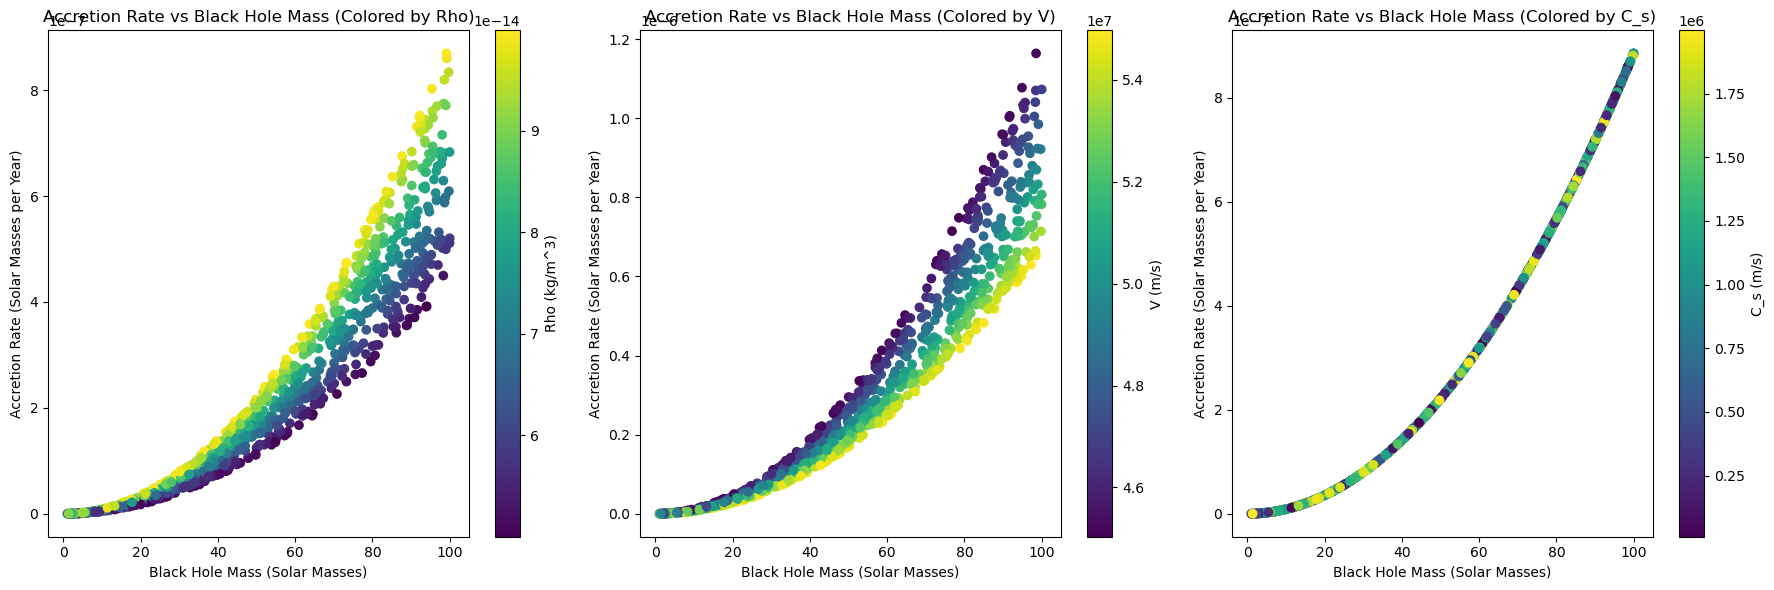

In [13]:
'''Plot Accretion Rate in term of Black Hole Masses with varies Parameters'''
# Randomize one parameter at a time, keeping the others fixed
num_points = 1000
fixed_rho = 1e-13  # Fixed density
fixed_v = 5e7      # Fixed relative velocity
fixed_c_s = 1e5    # Fixed sound speed

# Randomize black hole masses
black_hole_masses = np.random.uniform(1, 100, num_points)

# Randomizing rho while keeping v and c_s fixed
rho_values = np.random.uniform(5e-14, 1e-13, num_points)
accretion_rates_rho = [calculate_accretion_rate(mass, rho=rho, v=fixed_v, c_s=fixed_c_s) for mass, rho in zip(black_hole_masses, rho_values)]

# Randomizing v while keeping rho and c_s fixed
v_values = np.random.uniform(4.5e7, 5.5e7, num_points)
accretion_rates_v = [calculate_accretion_rate(mass, rho=fixed_rho, v=v, c_s=fixed_c_s) for mass, v in zip(black_hole_masses, v_values)]

# Randomizing c_s while keeping rho and v fixed
c_s_values = np.random.uniform(1e4, 2e6, num_points)
accretion_rates_c_s = [calculate_accretion_rate(mass, rho=fixed_rho, v=fixed_v, c_s=c_s) for mass, c_s in zip(black_hole_masses, c_s_values)]



plt.figure(figsize=(18, 6))

# Scatter plot for rho
plt.subplot(131)
plt.scatter(black_hole_masses, accretion_rates_rho, c=rho_values, cmap='viridis')
plt.colorbar(label='Rho (kg/m^3)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Accretion Rate (Solar Masses per Year)')
plt.title('Accretion Rate vs Black Hole Mass (Colored by Rho)')

# Scatter plot for v
plt.subplot(132)
plt.scatter(black_hole_masses, accretion_rates_v, c=v_values, cmap='viridis')
plt.colorbar(label='V (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Accretion Rate (Solar Masses per Year)')
plt.title('Accretion Rate vs Black Hole Mass (Colored by V)')

# Scatter plot for c_s
plt.subplot(133)
plt.scatter(black_hole_masses, accretion_rates_c_s, c=c_s_values, cmap='viridis')
plt.colorbar(label='C_s (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Accretion Rate (Solar Masses per Year)')
plt.title('Accretion Rate vs Black Hole Mass (Colored by C_s)')

plt.tight_layout()
plt.show()


According to the output plots, adjust the randomization to an acceptable range, and update the function calculate_accretion_rate with these randomization range.

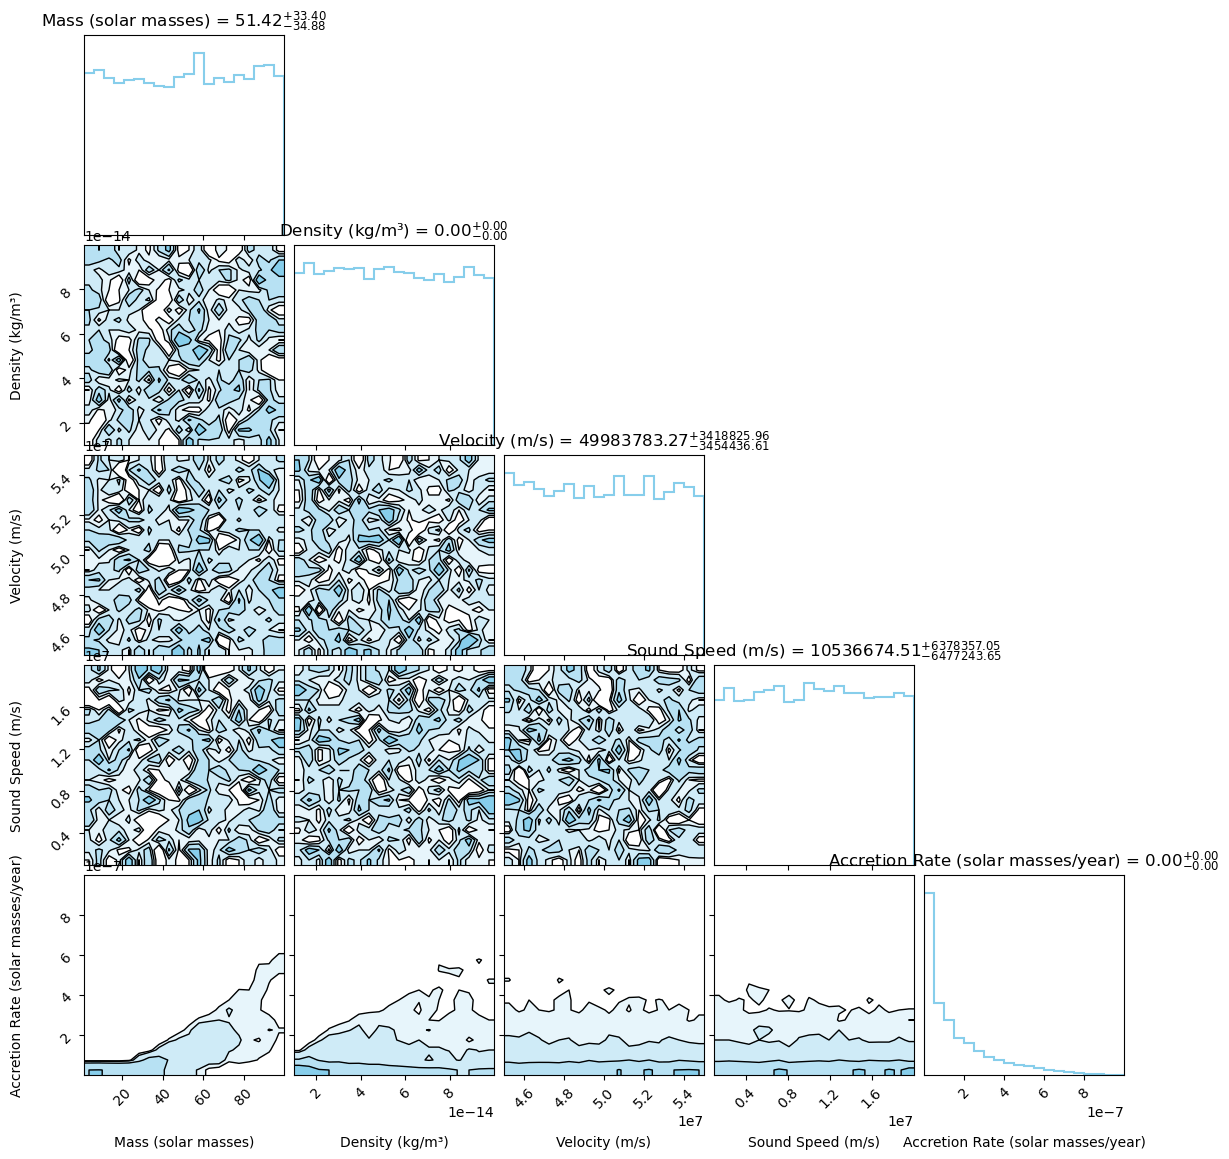

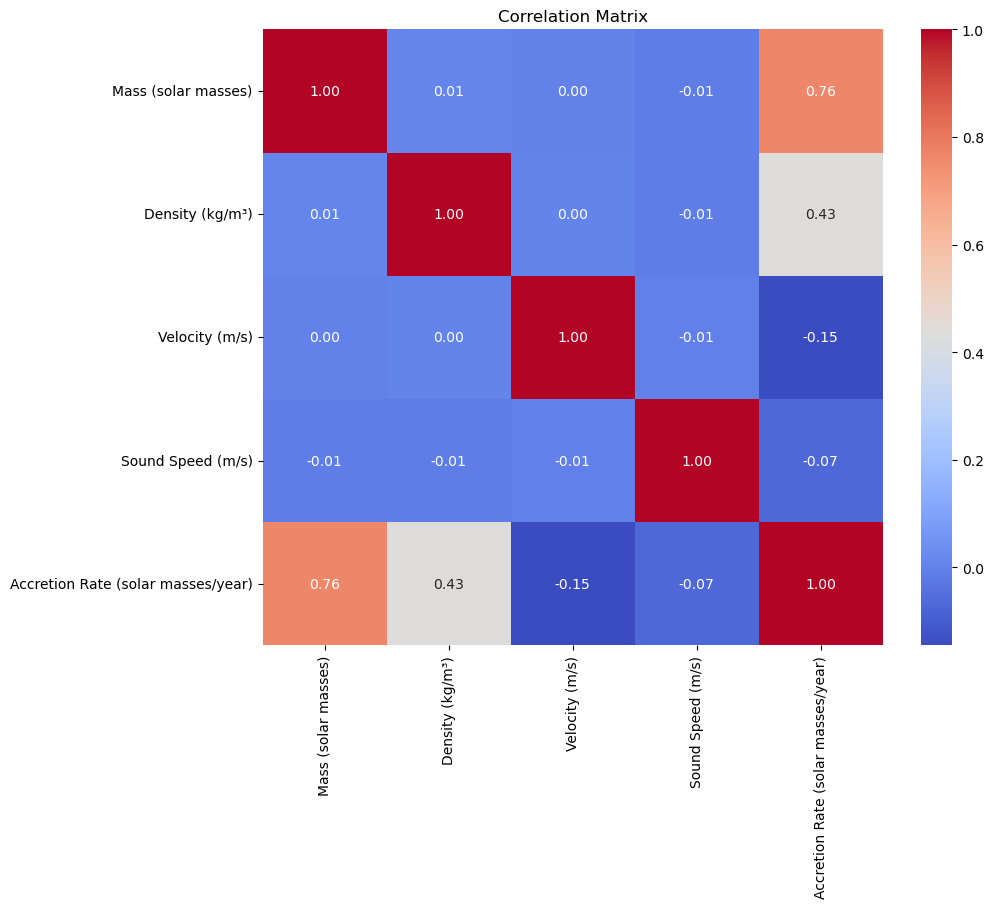

In [15]:
# observe the correlation between black hole mass, density of ambient object, relative 
# velocity between the object and the ambient medium, and Sound speed of the ambient medium
def pearson_correlation(x, y):
    """
    Calculates the Pearson correlation coefficient between two arrays x and y.
    """
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

    return numerator / denominator if denominator != 0 else 0

# Monte Carlo Simulation Parameters
num_simulations = 10000
black_hole_mass_range = (1, 100) # in solar masses
rho_range = (1e-14, 1e-13) # in kg/m^3
v_range = (4.5e7, 5.5e7) # in m/s
c_s_range = (1e6, 2e7) # in m/s

masses = np.random.uniform(*black_hole_mass_range, num_simulations)
rhos = np.random.uniform(*rho_range, num_simulations)
vs = np.random.uniform(*v_range, num_simulations)
c_ss = np.random.uniform(*c_s_range, num_simulations)
accretion_rates = np.array([calculate_accretion_rate(m, rho, v, c_s) for m, rho, v, c_s in zip(masses, rhos, vs, c_ss)])

data = np.vstack([masses, rhos, vs, c_ss, accretion_rates]).T

# Labels for each parameter
labels = ['Mass (solar masses)', 'Density (kg/m³)', 'Velocity (m/s)', 'Sound Speed (m/s)', 'Accretion Rate (solar masses/year)']

figure = corner.corner(data, labels=labels, show_titles=True, title_kwargs={"fontsize": 12},
                       color='skyblue',
                       hist_kwargs={'density': True, 'histtype': 'step', 'linewidth': 1.5},
                       plot_density=True,
                       plot_datapoints=False,
                       fill_contours=True,
                       contour_kwargs={'colors': 'black', 'linewidths': 1})
plt.show()

# Monte Carlo Simulation Parameters
num_simulations = 10000
black_hole_mass_range = (1, 100)  # in solar masses
rho_range = (1e-14, 1e-13)  # in kg/m^3
v_range = (4.5e7, 5.5e7)  # in m/s
c_s_range = (1e6, 2e7)  # in m/s

# Generating random data for each parameter
masses = np.random.uniform(*black_hole_mass_range, num_simulations)
rhos = np.random.uniform(*rho_range, num_simulations)
vs = np.random.uniform(*v_range, num_simulations)
c_ss = np.random.uniform(*c_s_range, num_simulations)

# Calculating accretion rates
accretion_rates = np.array([calculate_accretion_rate(m, rho, v, c_s) for m, rho, v, c_s in zip(masses, rhos, vs, c_ss)])

# Stacking the data and calculating the correlation matrix
data = np.vstack([masses, rhos, vs, c_ss, accretion_rates]).T
correlation_matrix = np.array([[pearson_correlation(data[:, i], data[:, j]) for i in range(data.shape[1])] for j in range(data.shape[1])])

# Labels for each parameter
labels = ['Mass (solar masses)', 'Density (kg/m³)', 'Velocity (m/s)', 'Sound Speed (m/s)', 'Accretion Rate (solar masses/year)']

# Creating the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Here I run 10000 times monte carlo simulation to explore the correlation between our interested parameters. This is as what was expected: the mass of black hole contributes significantly to the accretion rate. However, note that the density also has a relatively high correlation with the accretion rate comparing to other parameters, so I should keep this in mind in the future work.

### 2. Radiation
Since radiation is emitted by the accretion process as luminosity, it is important to consider the radiation in doing the modeling. The luminosity is typically calculated by (https://en.wikipedia.org/wiki/Luminosity#:~:text=Luminosity%20is%20an%20absolute%20measure,galaxy%2C%20or%20other%20astronomical%20objects.)
$$Radiation = \epsilon \times \dot{M} \times 1.98847 \times 10^{30} \times c^2$$
where
\begin{align}
\dot{M} & : \text{Efficiency factor - typically around 0.1 for non-rotating black holes} \\
c & : \text{speed of light} \\
R_{acc} & : \text{accretion rate} \\
\end{align}


In [16]:
def calculate_radiation(accretion_rate, epsilon = 0.1):
    '''
    The accretion rate is obtained from the previous function calculate_accretion_rate
    '''
    c = 299792458 * u.m / u.s

    # calculate the luminosity (or radiation)
    radiation = epsilon * accretion_rate * 1.98847e30 * c**2  # Convert accretion rate back to kg/s from solar mass

    return radiation


In [17]:
# Test the function calculate_radiation
print(calculate_radiation(calculate_accretion_rate(100)))

8.223440214074208e+31 m2 yr / s3


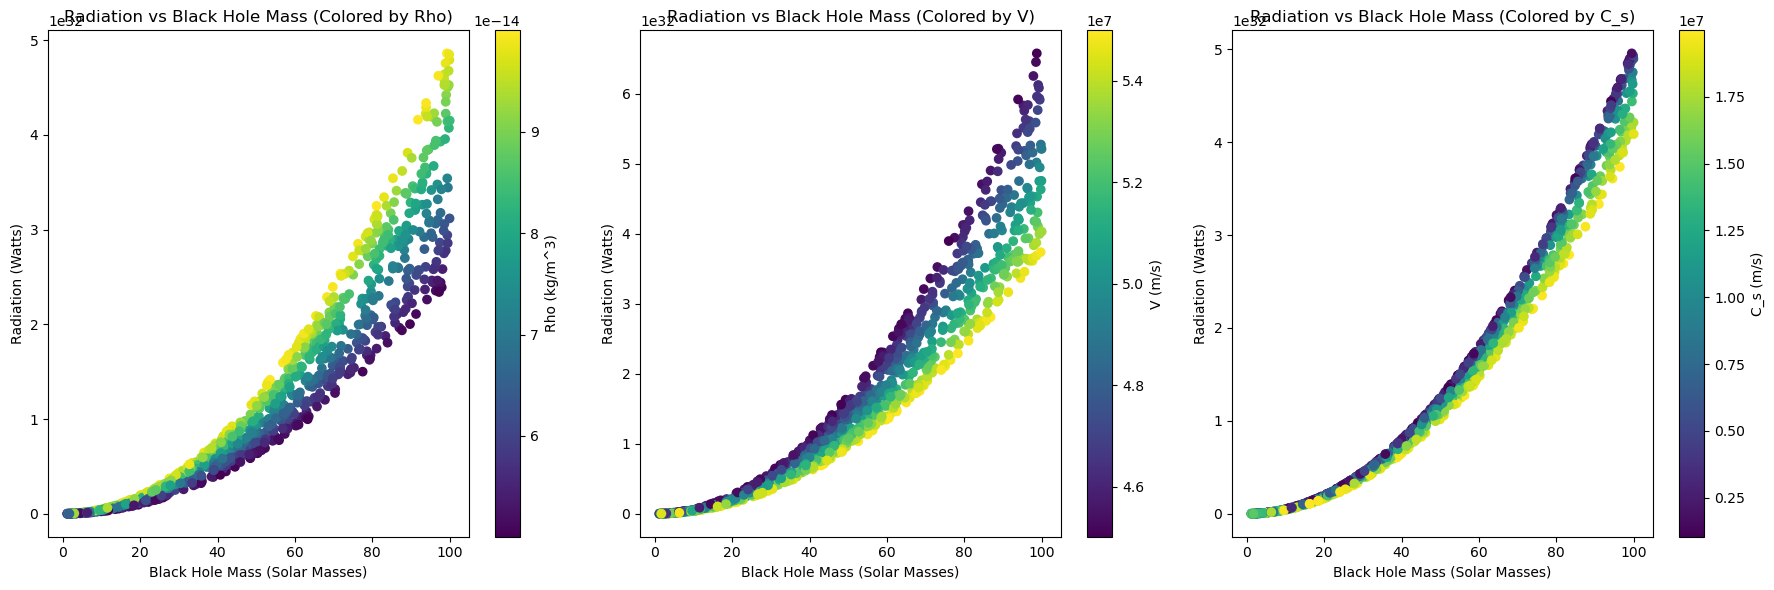

In [18]:
'''Plot Radiation in term of Black Hole Masses with varies Parameters'''
# Randomize the parameters and calculate accretion rates and radiation
num_points = 1000
fixed_rho = 1e-13  # Fixed density
fixed_v = 5e7      # Fixed relative velocity
fixed_c_s = 5e6    # Fixed sound speed

# Randomize black hole masses
black_hole_masses = np.random.uniform(1, 100, num_points)

# Randomizing rho while keeping v and c_s fixed
rho_values = np.random.uniform(5e-14, 1e-13, num_points)
accretion_rates_rho = [calculate_accretion_rate(mass, rho=rho, v=fixed_v, c_s=fixed_c_s) for mass, rho in zip(black_hole_masses, rho_values)]
radiation_rho = [calculate_radiation(rate) for rate in accretion_rates_rho]

# Randomizing v while keeping rho and c_s fixed
v_values = np.random.uniform(4.5e7, 5.5e7, num_points)
accretion_rates_v = [calculate_accretion_rate(mass, rho=fixed_rho, v=v, c_s=fixed_c_s) for mass, v in zip(black_hole_masses, v_values)]
radiation_v = [calculate_radiation(rate) for rate in accretion_rates_v]

# Randomizing c_s while keeping rho and v fixed
c_s_values = np.random.uniform(1e6, 2e7, num_points)
accretion_rates_c_s = [calculate_accretion_rate(mass, rho=fixed_rho, v=fixed_v, c_s=c_s) for mass, c_s in zip(black_hole_masses, c_s_values)]
radiation_c_s = [calculate_radiation(rate) for rate in accretion_rates_c_s]

radiation_rho = [x.value for x in radiation_rho]
radiation_v = [x.value for x in radiation_v]
radiation_c_s = [x.value for x in radiation_c_s]

# Plotting the results
plt.figure(figsize=(18, 6))

# Scatter plot for radiation vs black hole mass (Colored by Rho)
plt.subplot(131)
plt.scatter(black_hole_masses, radiation_rho, c=rho_values, cmap='viridis')
plt.colorbar(label='Rho (kg/m^3)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Radiation (Watts)')
plt.title('Radiation vs Black Hole Mass (Colored by Rho)')

# Scatter plot for radiation vs black hole mass (Colored by V)
plt.subplot(132)
plt.scatter(black_hole_masses, radiation_v, c=v_values, cmap='viridis')
plt.colorbar(label='V (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Radiation (Watts)')
plt.title('Radiation vs Black Hole Mass (Colored by V)')

# Scatter plot for radiation vs black hole mass (Colored by C_s)
plt.subplot(133)
plt.scatter(black_hole_masses, radiation_c_s, c=c_s_values, cmap='viridis')
plt.colorbar(label='C_s (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Radiation (Watts)')
plt.title('Radiation vs Black Hole Mass (Colored by C_s)')

plt.tight_layout()
plt.show()

### 3. jet production
The jet which emits energy is determined by many factor and is usually very hard to model, so we here assume a simpler case where the jets are produced when the accretion rate and radiation exceed certain limit. We assume the limits to be:

1. accretion rate thershold = $10^{-4}$ solar mass per year
2. radiation thershold = $10^{36}$ watts

In [19]:
def determine_jet_production(accretion_rate, radiation):
    # Limits when jet production takes place
    accretion_rate_threshold = 1e-4  # in solar masses per year
    radiation_threshold = 1e36

    # Determine jet production
    jets = accretion_rate > accretion_rate_threshold and radiation > radiation_threshold
    return jets
    # returns true or false

In [20]:
# Examples for determine_jet_production
print(determine_jet_production(1e-7, 1e20)) # neither parameter exceeds the limit
print(determine_jet_production(1, 1e30)) # the accretion rate exceeds the limit
print(determine_jet_production(1e-5, 1e40)) # the radiation exceeds the limit
print(determine_jet_production(1, 1e40)) # both exceeds the limit

False
False
False
True


### combining the three function

In [21]:
def accretion_model(black_hole_mass, accretion_radius, other_parameters):
    accretion_rate = calculate_accretion_rate(black_hole_mass, accretion_radius, other_parameters)
    radiation = calculate_radiation(accretion_rate, other_parameters)
    jets = determine_jet_production(accretion_rate, radiation, other_parameters)

    return accretion_rate, radiation, jets

Now I can add these functions to the original class as the first part of the code:

In [22]:
class Galaxy:
    '''initialize the galaxy'''
    def __init__(self, mass, position, velocity, black_hole_mass):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.black_hole_mass = black_hole_mass
    
    '''black hole accretion model'''
    def calculate_accretion_rate(black_hole_mass, 
                                 rho = np.random.uniform(1e-14, 1e-13), 
                                 v = np.random.uniform(4.5e7, 5.5e7), 
                                 c_s = np.random.uniform(1e6, 2e7)):
        # The input black hole mass should in the unit of solar mass
        G = 6.67430e-11 * u.m**3 / u.kg / u.s**2 # gravitational constant with u.m**3 / u.kg / u.s**2
        M = black_hole_mass * 1.98847e30 * u.kg  # solar masses to kg
        rho = rho * u.kg / u.m**3  # density of the accreting material in kg/m^3
        v = v * u.m / u.s  # relative velocity in m/s
        c_s = c_s * u.m / u.s # sound speed in the material in m/s
        # Bondi-Hoyle-Lyttleton accretion rate
        accretion_rate = (4 * np.pi * G**2 * M**2 * rho) / ((v**2 + c_s**2)**(3/2))
        # Convert accretion rate to solar masses per year
        accretion_rate_solar_masses_per_year = accretion_rate.to(u.kg / u.s) / (1.98847e30 * u.kg) * (60*60*24*365) * u.year
        return accretion_rate_solar_masses_per_year
    
    def calculate_radiation(accretion_rate, epsilon = 0.1):
        # The accretion rate is obtained from the previous function calculate_accretion_rate
        c = 299792458 * u.m / u.s
        # calculate the luminosity (or radiation)
        radiation = epsilon * accretion_rate * 1.98847e30 * c**2  # Convert accretion rate back to kg/s from solar mass
        return radiation
    
    def accretion_model(black_hole_mass, accretion_radius, other_parameters):
        accretion_rate = calculate_accretion_rate(black_hole_mass, accretion_radius, other_parameters)
        radiation = calculate_radiation(accretion_rate, other_parameters)
        jets = determine_jet_production(accretion_rate, radiation, other_parameters)
        return accretion_rate, radiation, jets
    
    # Gas Dynamics and Interstellar Medium
    def gas_dynamics(galaxy):
        '''
        This models the impliment model of the dynamics of gas in and around the galaxies
        The processes like cooling, heating, and interaction with AGN radiation should be considered
        '''
        pass
    
    # Galaxy Interaction and Dynamics
    def update_galaxy_dynamics(galaxies):
        '''
        Implement gravitational interactions between galaxies.
        Update positions and velocities based on gravitational forces.
        '''
        pass

## B) Cooling and Heating
According to my research of other people's work, the fully modeled dynamic of mass cannot be easily computed from a local computer and requires much more computation work. Thus, for my work, I will be creating a easier model with more idealized condition than what is actually happening in AGN galaxies but keep all the key concepts in AGN gas dynamics simulation. 

The temperature change within the galaxy is another important thing to consider. From previous study (Li et al 2016), they analyzed a battle between radiative cooling and AGN heating. Thus the cooling and heating are happening at the same time within the AGN host galaxy. That being said, we want to set different rate of cooling and heating in terms of other parameters.

This is complex as a lot of parameters could contribute to the cooling/ heating rates, such as mass, cooling coefficient, environment, AGN activity, and many more. We here consider some of the most significant factor in cooling and heating, which are:

1. **density**: Cooling processes in the ISM are significantly influenced by the gas's density, and it is usually proportional to density square
2. **cooling coefficient**
3. **temperature**: Cooling processes in the ISM are inversely proportional to temperature
4. **time**: The rate might decrease over time as the galaxy loses energy
5. **composition**: The composition of AGN galaxies are really hard to determine, I will keep this away from the simulation for now, but may come back to it as this project becomes more developed
6. **metallicity**
7. **star formation rate**
8. **AGN luminosity**: this was calculated above with the radiation

In [23]:
# combining what has been discussed above, cooling rate is proportional to density^2, 
# and inversely proportional to time and temperature
def cooling_function(temperature):
    if temperature < 1e4:
        # Low-temperature regime
        new_temp = 1e-22 * temperature
        return new_temp
    else:
        # High-temperature regime
        new_temp = 1e-24 * temperature**1.5
        return new_temp

def heating_function(star_formation_initial, agn_luminosity_initial, density, time):
    decay_factor = 0.05  # Represents a decay over time
    # Star formation rate and AGN luminosity decrease over time
    star_formation_rate = star_formation_initial / (1 + decay_factor * time)
    agn_luminosity = agn_luminosity_initial / (1 + decay_factor * time)

    return 1e-35 * (star_formation_rate + agn_luminosity) * density

def cooling_rate(new_temp, density):
    cooling_rate = new_temp * density**2
    return cooling_rate

def ism_temperature_evolution(initial_temperature, density, metallicity, star_formation_rate, agn_luminosity, timestep, total_time):
    temperature = initial_temperature

    for time in range(total_time):
        # cooling and heating rates
        cooling_rate = cooling_function(temperature) * density**2
        heating_rate = heating_function(star_formation_rate, agn_luminosity, density, time)

        # Update temperature
        temperature_change = (heating_rate - cooling_rate) * timestep
        temperature += temperature_change

        if temperature < 10:  # 10 K is a reasonable lower limit for ISM temperatures
            temperature = 10

    return temperature

In [24]:
# Test the function
initial_temperature = 1000000  # in Kelvin
density = 1.0e5  # in particles per cubic centimeter
metallicity = 1.0  # Solar metallicity
star_formation_rate = 2.0  # Solar masses per year
agn_luminosity = 1e44  # in ergs per second
timestep = 1e3  # in years
total_time = 1000  # number of timesteps
final_temperature = ism_temperature_evolution(initial_temperature, density, metallicity, star_formation_rate, agn_luminosity, timestep, total_time)
print(f"Final ISM Temperature: {final_temperature} K")

Final ISM Temperature: 3.669852783696508e+17 K


# Week 2 (Milestone2 start)

In [25]:
def ism_temperature_evolution_over_time(initial_temperature, 
                                        density, 
                                        metallicity, 
                                        star_formation_initial, 
                                        agn_luminosity_initial, 
                                        timestep, 
                                        total_time):
    temperature = initial_temperature
    temperatures, cooling_rates, heating_rates = [], [], []

    for time in range(total_time):
        cooling_rate = cooling_function(temperature) * density**2
        heating_rate = heating_function(star_formation_initial, agn_luminosity_initial, density, time)

        temperature_change = (heating_rate - cooling_rate) * timestep
        # print(heating_rate, cooling_rate)
        temperature += temperature_change
        if temperature < 10:
            temperature = 10

        temperatures.append(temperature)
        cooling_rates.append(cooling_rate)
        heating_rates.append(heating_rate)

    return temperatures, cooling_rates, heating_rates

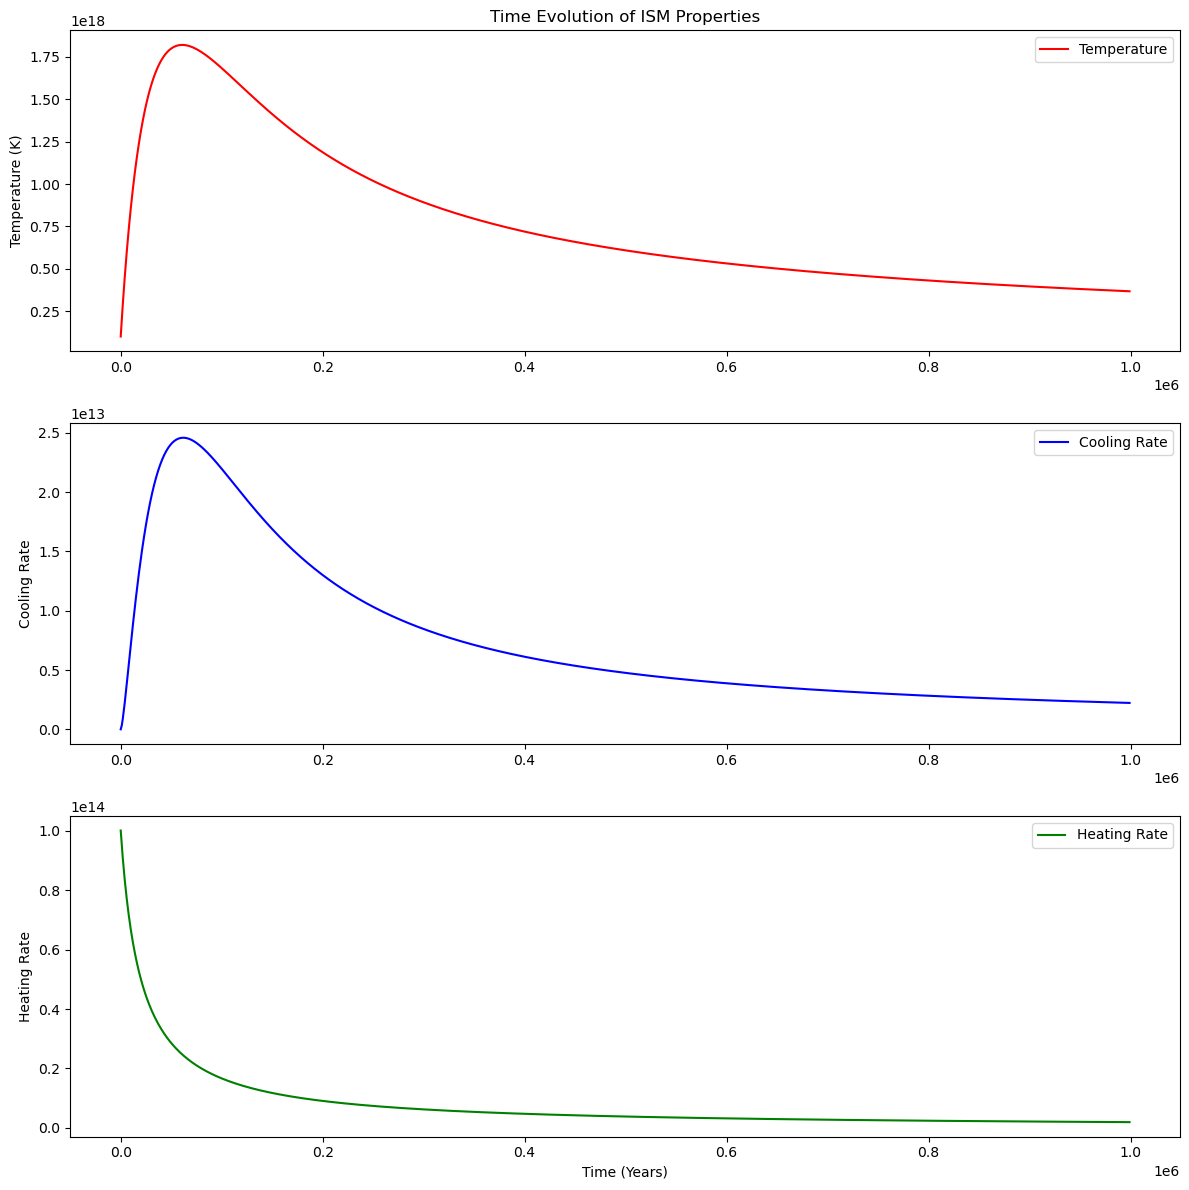

In [26]:
# simulation
temperatures, cooling_rates, heating_rates = ism_temperature_evolution_over_time(initial_temperature, density, metallicity, star_formation_rate, agn_luminosity, timestep, total_time)
time_axis = [timestep * i for i in range(total_time)]
plt.figure(figsize=(12, 12))

# Temperature
plt.subplot(3, 1, 1)
plt.plot(time_axis, temperatures, label='Temperature', color='red')
plt.ylabel('Temperature (K)')
plt.title('Time Evolution of ISM Properties')
plt.legend()

# Cooling
plt.subplot(3, 1, 2)
plt.plot(time_axis, cooling_rates, label='Cooling Rate', color='blue')
plt.ylabel('Cooling Rate')
plt.legend()

# Heating
plt.subplot(3, 1, 3)
plt.plot(time_axis, heating_rates, label='Heating Rate', color='green')
plt.ylabel('Heating Rate')
plt.xlabel('Time (Years)')
plt.legend()

plt.tight_layout()
plt.show()

From this plot, it seems like the temperature follows similar evolution as the cooling rate, however, when I did the attempts of changing the value of density, this trend varies a lot. This is impressive and should be further explored, so I want to plot out the evolution of ISM temperature and cooling/heating rates corresponding to different density environment. This is crucial as it reveals potential environmental impact on AGN galaxy evolution. Some methods I could use is to
1. again, use the monte carlo simulation to find the correlation, and 
2. plot out the rates and temperature at different density to observe the trends.

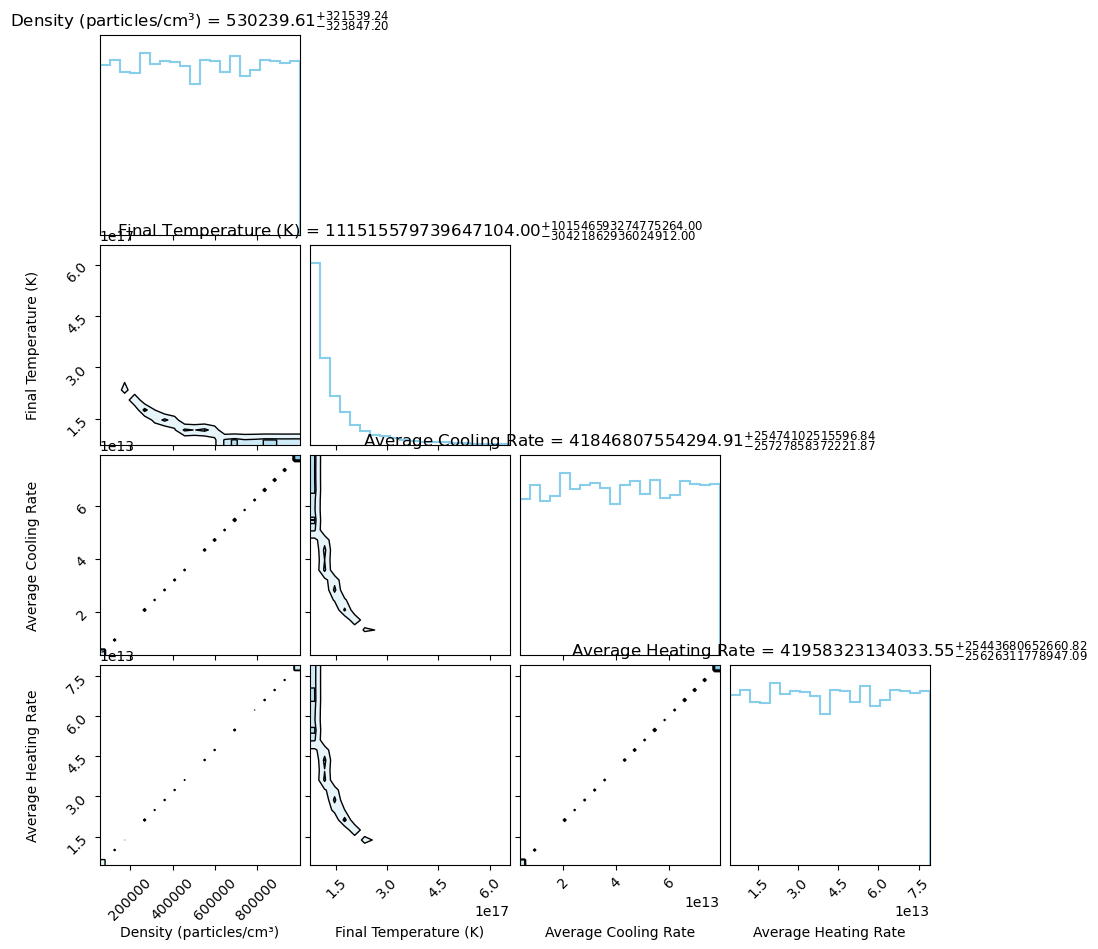

In [27]:
# monte carlo simulation to find the correlation between density and rates/temperature
num_simulations = 10000
density_range = (5.5e4, 1e6)

initial_temperature = 1000000  # in Kelvin
metallicity = 1.0  # Solar metallicity
star_formation_rate = 2.0  # Solar masses per year
agn_luminosity = 1e44  # in ergs per second
timestep = 1e3  # in years
total_time = 1000  # number of timesteps

densities = np.random.uniform(*density_range, num_simulations)
final_temperatures = []
average_cooling_rates = []
average_heating_rates = []

for density in densities:
    temperatures, cooling_rates, heating_rates = ism_temperature_evolution_over_time(
        initial_temperature, density, metallicity, star_formation_rate, 
        agn_luminosity, timestep, total_time
    )
    final_temperatures.append(temperatures[-1])
    average_cooling_rates.append(np.mean(cooling_rates))
    average_heating_rates.append(np.mean(heating_rates))
simulation_data = np.vstack([densities, final_temperatures, average_cooling_rates, average_heating_rates]).T
corner_labels = ['Density (particles/cm³)', 'Final Temperature (K)', 'Average Cooling Rate', 'Average Heating Rate']
corner_figure = corner.corner(simulation_data, labels=corner_labels, show_titles=True, title_kwargs={"fontsize": 12},
                              color='skyblue',
                              hist_kwargs={'density': True, 'histtype': 'step', 'linewidth': 1.5},
                              plot_density=True,
                              plot_datapoints=False,
                              fill_contours=True,
                              contour_kwargs={'colors': 'black', 'linewidths': 1})
plt.show()

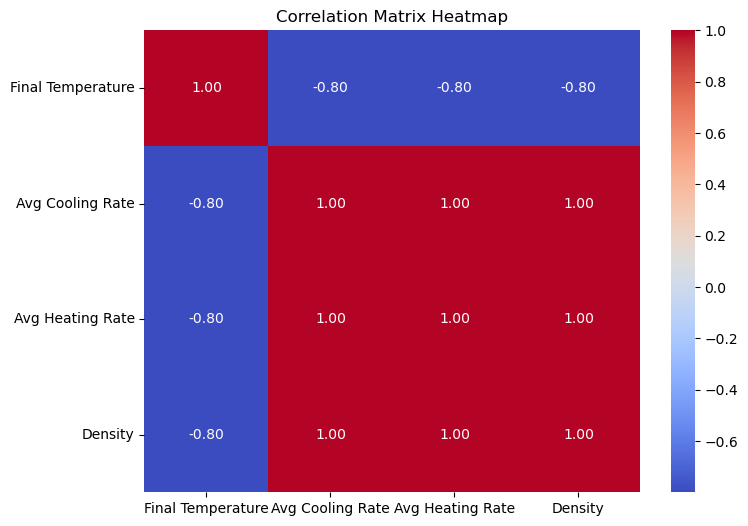

In [28]:
# the heatmap for correlations between
# temperature, cooling rate, heating rate, and density
simulation_data_array = np.array([final_temperatures, average_cooling_rates, average_heating_rates, densities])
correlation_matrix = np.corrcoef(simulation_data_array)
heatmap_labels = ['Final Temperature', 'Avg Cooling Rate', 'Avg Heating Rate', 'Density']

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, xticklabels=heatmap_labels, yticklabels=heatmap_labels, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

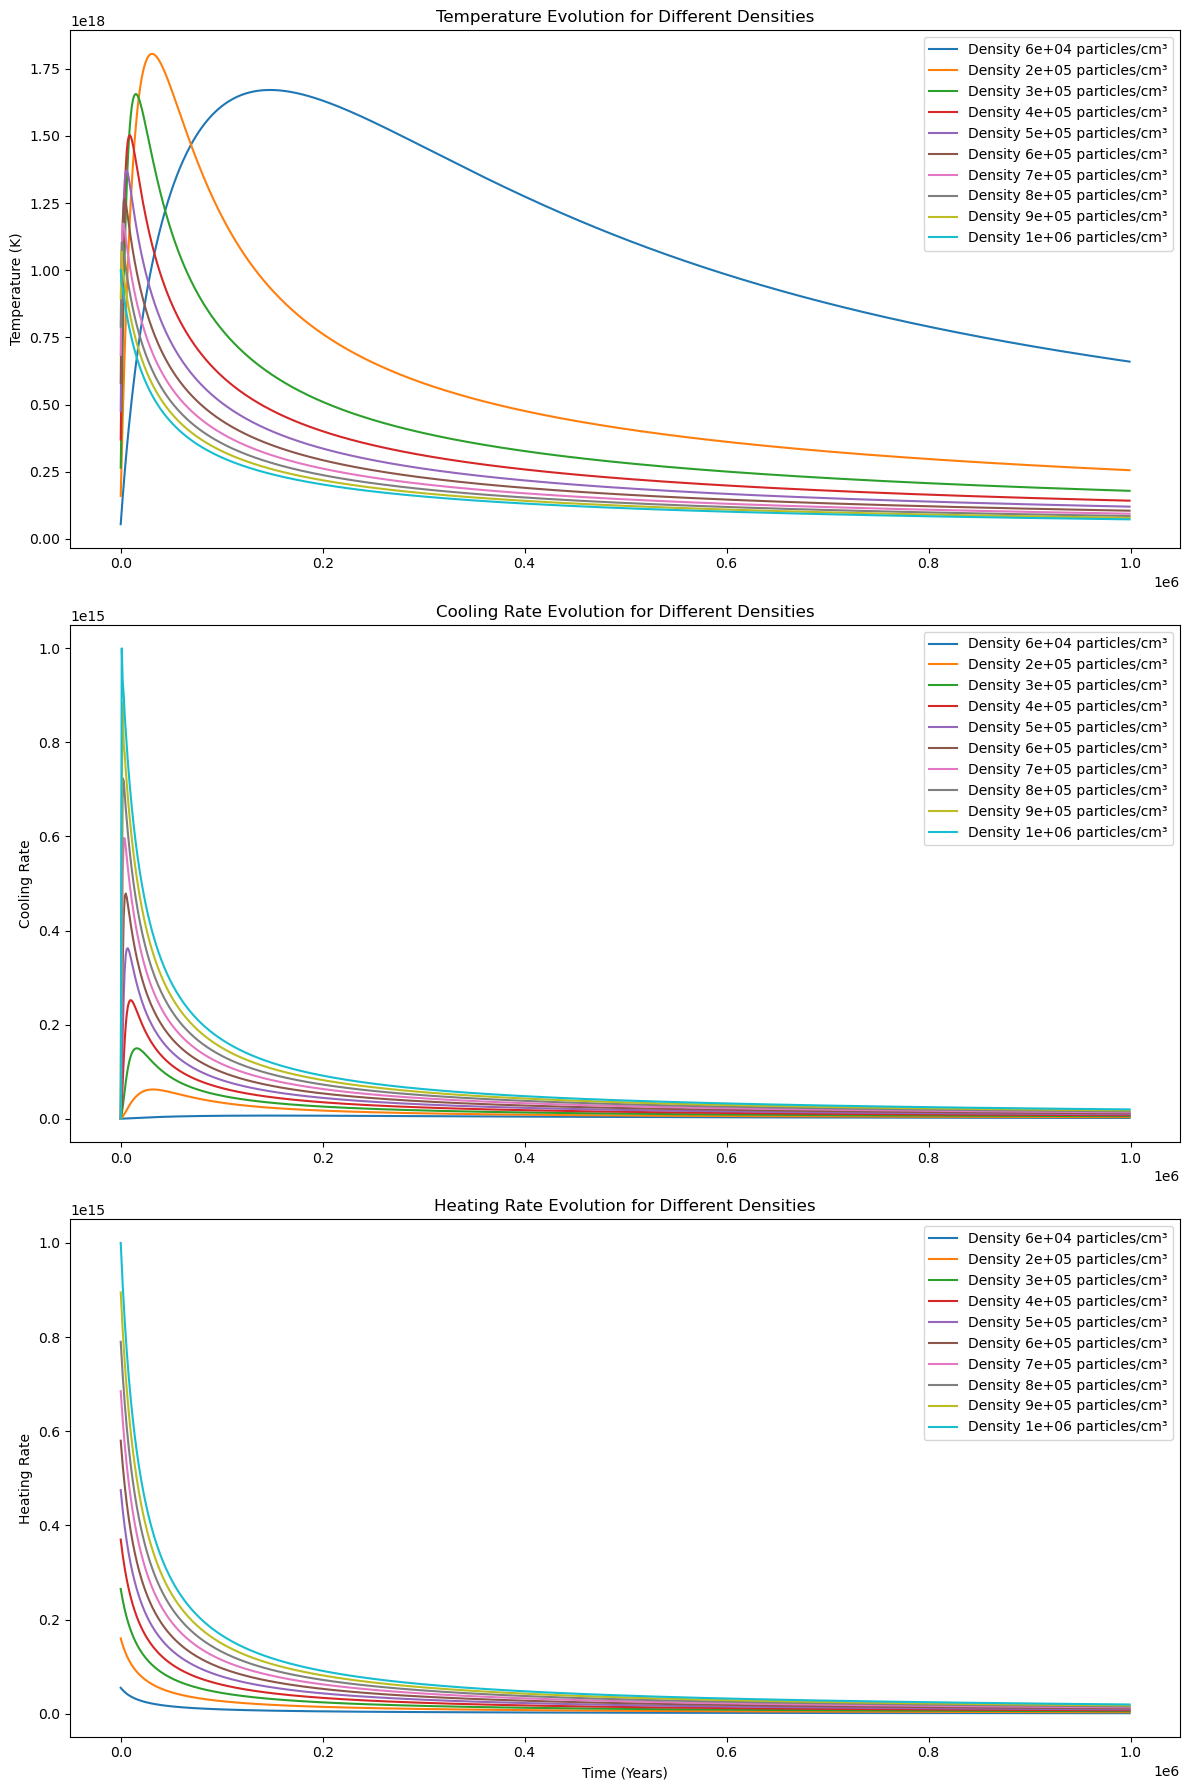

In [29]:
selected_densities = np.linspace(density_range[0], density_range[1], 10)

plt.figure(figsize=(12, 18))

for density in selected_densities:
    temperatures, cooling_rates, heating_rates = ism_temperature_evolution_over_time(
        initial_temperature, density, metallicity, star_formation_rate, 
        agn_luminosity, timestep, total_time
    )
    time_axis = [timestep * i for i in range(total_time)]

    # Temperature
    plt.subplot(3, 1, 1)
    plt.plot(time_axis, temperatures, label=f'Density {density:.0e} particles/cm³')

    # cooling
    plt.subplot(3, 1, 2)
    plt.plot(time_axis, cooling_rates, label=f'Density {density:.0e} particles/cm³')

    # heating
    plt.subplot(3, 1, 3)
    plt.plot(time_axis, heating_rates, label=f'Density {density:.0e} particles/cm³')

plt.subplot(3, 1, 1)
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution for Different Densities')
plt.legend()

plt.subplot(3, 1, 2)
plt.ylabel('Cooling Rate')
plt.title('Cooling Rate Evolution for Different Densities')
plt.legend()

plt.subplot(3, 1, 3)
plt.ylabel('Heating Rate')
plt.xlabel('Time (Years)')
plt.title('Heating Rate Evolution for Different Densities')
plt.legend()

plt.tight_layout()
plt.show()

As density increases, the heating rate increases, the cooling rate increases as well, and the overall temperature peaks lower and decays faster.

Also, from the correlation matrix heat map, it is clear how things are closely related in this cooling and heading system. It is as expected because environment itself is a very deterministic factor.

The density = $1e5$ to $1e6$ is a fair estimation for the average density inside of an AGN galaxy, but note that the density varies a lot in different parts of a galaxy. For my targets which are AGN galaxies, they are extremely powerful towards the center mainly due to the super massive blackhole. Thus the density at broad line region (the region close to black hole) of AGN galaxies can exceed $1e9$ particles per cubic centimeter. As the radius moves away from the center of the galaxy, the narrow line region typically has densities in the range of $1e2$ to $1e6$.

To make the system more realistic, I can write a function of density in terms of the radius. The typical relationship between density and radius can be expressed as
$$\rho(r) = \rho_0 (\frac{r}{r_0})^{-\alpha}$$
where 
\begin{align}
\rho(r) & : \text{The density as a function of radius from the center} \\
\rho_0 & : \text{the reference density, I here take it to be $1.0\times 10^5$ particles per cubic centimeter} \\
r_0 & : \text{reference radius, I here take it to be 1 parsec} \\
r & : \text{the radius from the center, in unit of parsec} \\
\alpha & : \text{the index of this power law, I here take it to be 1.5, this varies for different galaxies}
\end{align}

In [30]:
# we can define the function density
def density_radius(r, rho_0 = 1e5, r_0 = 1, alpha = 1.5):
    """
    Density as a function of radius for an AGN environment.
    r: Radius in parsec
    rho_0: Reference density at reference radius r_0
    r_0: Reference radius
    alpha: Power-law index
    """
    rho_r = rho_0 * (r / r_0) ** (-alpha)
    return rho_r

Then, I can update the previous functions:

In [31]:
def heating_function(star_formation_initial,  
                     r, 
                     time, 
                     agn_luminosity_initial = 1e44,
                     rho_0 = 1e5, 
                     r_0 = 1, 
                     alpha = 1.5):
    decay_factor = 0.05
    star_formation_rate = star_formation_initial / (1 + decay_factor * time)
    agn_luminosity = agn_luminosity_initial / (1 + decay_factor * time)
    density = density_radius(r, rho_0, r_0, alpha)
    new_temp = 1e-35 * (star_formation_rate + agn_luminosity) * density
    return new_temp

def cooling_function(temperature, r, rho_0 = 1e5, r_0 = 1, alpha = 1.5):
    density = density_radius(r, rho_0, r_0, alpha)
    if temperature < 1e4:
        new_temp = 1e-22 * temperature * density**2
    else:
        new_temp = 1e-24 * temperature**1.5 * density**2
    return new_temp

def cooling_rate(new_temp, density):
    cooling_rate = new_temp * density**2
    return cooling_rate

def ism_temperature_evolution(initial_temperature, 
                              r, 
                              metallicity, 
                              star_formation_rate, 
                              agn_luminosity, timestep, total_time):
    temperature = initial_temperature
    density = density_radius(r, rho_0, r_0, alpha)
    for time in range(total_time):
        # cooling and heating rates
        cooling_rate = cooling_function(temperature, r, rho_0 = 1e5, r_0 = 1, alpha = 1.5) * density**2
        heating_rate = heating_function(star_formation_rate, agn_luminosity, density, time)
        temperature_change = (heating_rate - cooling_rate) * timestep
        temperature += temperature_change
        if temperature < 10:  # 10 K is a reasonable lower limit for ISM temperatures
            temperature = 10
    return temperature

def ism_temperature_evolution_over_time(initial_temperature, 
                                        r, 
                                        rho_0=1e5, 
                                        r_0=1, 
                                        alpha=1.5, 
                                        metallicity=1.0, 
                                        star_formation_initial=2.0, 
                                        agn_luminosity_initial=1e44, 
                                        timestep=1e3, 
                                        total_time=10000):
    temperature = initial_temperature
    temperatures, cooling_rates, heating_rates = [], [], []
    for time in range(total_time):
        density = density_radius(r, rho_0, r_0, alpha)
        cooling_rate = cooling_function(temperature, r, rho_0, r_0, alpha) * density**2
        heating_rate = heating_function(star_formation_initial, agn_luminosity_initial, r, rho_0, r_0, alpha, time)
        temperature_change = (heating_rate - cooling_rate) * timestep
        temperature += temperature_change
        if temperature < 10:
            temperature = 10
        temperatures.append(temperature)
        cooling_rates.append(cooling_rate)
        heating_rates.append(heating_rate)
    return temperatures, cooling_rates, heating_rates

In [32]:
# Example
r = 2.0  # radius in parsecs
initial_temperature = 100000  # in Kelvin
temperatures, cooling_rates, heating_rates = ism_temperature_evolution_over_time(initial_temperature, r)
temperatures[:10]

[50589.411559869055,
 32810.32404018419,
 23524.171671272197,
 17886.6070103183,
 14148.842176469958,
 11519.171404028086,
 9587.417107373523,
 8089.3831843464095,
 6825.417061792283,
 5758.945645887238]

Add these to the previously defined class:

In [33]:
class Galaxy:
    '''initialize the galaxy'''
    def __init__(self, mass, position, velocity, black_hole_mass):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.black_hole_mass = black_hole_mass
    
    '''black hole accretion model'''
    def calculate_accretion_rate(black_hole_mass, 
                                 rho = np.random.uniform(1e-14, 1e-13), 
                                 v = np.random.uniform(4.5e7, 5.5e7), 
                                 c_s = np.random.uniform(1e6, 2e7)):
        # The input black hole mass should in the unit of solar mass
        G = 6.67430e-11 * u.m**3 / u.kg / u.s**2 # gravitational constant with u.m**3 / u.kg / u.s**2
        M = black_hole_mass * 1.98847e30 * u.kg  # solar masses to kg
        rho = rho * u.kg / u.m**3  # density of the accreting material in kg/m^3
        v = v * u.m / u.s  # relative velocity in m/s
        c_s = c_s * u.m / u.s # sound speed in the material in m/s
        # Bondi-Hoyle-Lyttleton accretion rate
        accretion_rate = (4 * np.pi * G**2 * M**2 * rho) / ((v**2 + c_s**2)**(3/2))
        # Convert accretion rate to solar masses per year
        accretion_rate_solar_masses_per_year = accretion_rate.to(u.kg / u.s) / (1.98847e30 * u.kg) * (60*60*24*365) * u.year
        return accretion_rate_solar_masses_per_year
    
    def calculate_radiation(accretion_rate, epsilon = 0.1):
        # The accretion rate is obtained from the previous function calculate_accretion_rate
        c = 299792458 * u.m / u.s
        # calculate the luminosity (or radiation)
        radiation = epsilon * accretion_rate * 1.98847e30 * c**2  # Convert accretion rate back to kg/s from solar mass
        return radiation
    
    def accretion_model(black_hole_mass, accretion_radius, other_parameters):
        accretion_rate = calculate_accretion_rate(black_hole_mass, accretion_radius, other_parameters)
        radiation = calculate_radiation(accretion_rate, other_parameters)
        jets = determine_jet_production(accretion_rate, radiation, other_parameters)
        return accretion_rate, radiation, jets
    
    '''cooling and heating process in different radius of the galaxy'''
    def heating_function(star_formation_initial,  
                         r, 
                         time, 
                         agn_luminosity_initial = 1e44,
                         rho_0 = 1e5, 
                         r_0 = 1, 
                         alpha = 1.5):
        decay_factor = 0.05
        star_formation_rate = star_formation_initial / (1 + decay_factor * time)
        agn_luminosity = agn_luminosity_initial / (1 + decay_factor * time)
        density = density_radius(r, rho_0, r_0, alpha)
        new_temp = 1e-35 * (star_formation_rate + agn_luminosity) * density
        return new_temp

    def cooling_function(temperature, r, rho_0 = 1e5, r_0 = 1, alpha = 1.5):
        density = density_radius(r, rho_0, r_0, alpha)
        if temperature < 1e4:
            new_temp = 1e-22 * temperature * density**2
        else:
            new_temp = 1e-24 * temperature**1.5 * density**2
        return new_temp

    def cooling_rate(new_temp, density):
        cooling_rate = new_temp * density**2
        return cooling_rate

    def ism_temperature_evolution(initial_temperature, 
                                  r, 
                                  metallicity, 
                                  star_formation_rate, 
                                  agn_luminosity, timestep, total_time):
        temperature = initial_temperature
        density = density_radius(r, rho_0, r_0, alpha)
        for time in range(total_time):
            # cooling and heating rates
            cooling_rate = cooling_function(temperature, r, rho_0 = 1e5, r_0 = 1, alpha = 1.5) * density**2
            heating_rate = heating_function(star_formation_rate, agn_luminosity, density, time)
            temperature_change = (heating_rate - cooling_rate) * timestep
            temperature += temperature_change
            if temperature < 10:  # 10 K is a reasonable lower limit for ISM temperatures
                temperature = 10
        return temperature

    def ism_temperature_evolution_over_time(initial_temperature, 
                                            r, 
                                            rho_0=1e5, 
                                            r_0=1, 
                                            alpha=1.5, 
                                            metallicity=1.0, 
                                            star_formation_initial=2.0, 
                                            agn_luminosity_initial=1e44, 
                                            timestep=1e3, 
                                            total_time=10000):
        temperature = initial_temperature
        temperatures, cooling_rates, heating_rates = [], [], []
        for time in range(total_time):
            density = density_radius(r, rho_0, r_0, alpha)
            cooling_rate = cooling_function(temperature, r, rho_0, r_0, alpha) * density**2
            heating_rate = heating_function(star_formation_initial, agn_luminosity_initial, r, rho_0, r_0, alpha, time)
            temperature_change = (heating_rate - cooling_rate) * timestep
            temperature += temperature_change
            if temperature < 10:
                temperature = 10
            temperatures.append(temperature)
            cooling_rates.append(cooling_rate)
            heating_rates.append(heating_rate)
        return temperatures, cooling_rates, heating_rates
    
    # Gas Dynamics and Interstellar Medium
    def gas_dynamics(galaxy):
        '''
        This models the impliment model of the dynamics of gas in and around the galaxies
        The processes like cooling, heating, and interaction with AGN radiation should be considered
        '''
        pass
    
    # Galaxy Interaction and Dynamics
    def update_galaxy_dynamics(galaxies):
        '''
        Implement gravitational interactions between galaxies.
        Update positions and velocities based on gravitational forces.
        '''
        pass

## C) Spectra Modeling for AGN galaxies
Spectra modeling is significant for studying gakaxies because it gives us information about a various things. Some typical ones includes:
1. **composition and chemical elemental abundances**: from analyzing a spectra of a galaxy, we can tell from the emission and absorption lines which components exists in the galaxies, also, the ratio between certain emission lines give us the chemical elemental abundances, which reveals the history of the galaxy because some element are more produced in certain age or phase of galaxy evolution.
2. **redshift**: by looking at the obvious emission and absorption lines from a galaxy's spectrum, we can compare it with the wavelength of that element in the rest frame spectrum, and by using $1+z = \frac{\lambda_{observed}}{\lambda_e}$ we can find the redshift of the galaxy, and thus how far the galaxy is from us. 
3. **stellar population**: since different stars have very different physical properties, we can tell from the spectra which kind of stars do the galaxy have and thus better understand the stellar populations of certain types of galaxies.
4. Spectra modeling also plays critical roles in **understanding black holes of AGN**, **studying dark matter and dark matter halo**, and **providing insights into the temperature and density**.
Thus we want to understand how AGN galaxies look like and potentially build AGN galaxy spectrum.

There are several things and steps I need to consider towards doing spectra modeling:
1. I need to **generate a power-law continuum**
2. consider **emission lines**
3. add in **noise**
4. consider **absorption feature**
I here use units that is typically used in experimental astrophysics, which are arbitrary unit for flux (we do not actually care about the unit of flux, what we care is the intensity and the ratios)

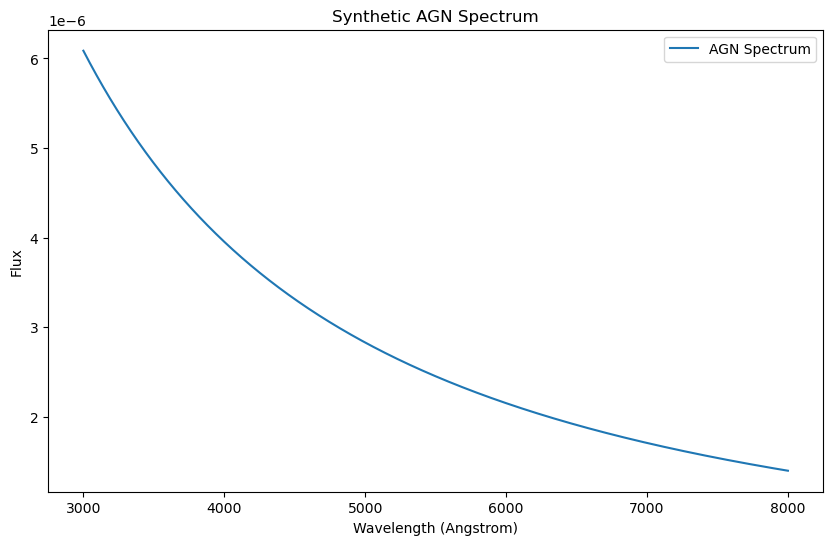

In [34]:
# Step 1
# we first assumed redshift 0 and generalize the power-law continuum
# most of the emission lines and absorption features are within wavelength range 3700 to 8000
# so I choose the wavelength range from 3000 to 10000
# alpha is the power-law slope
wavelengths = np.linspace(3000, 8000, 10000)
alpha = -1.5
flux_continuum = wavelengths ** alpha

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, flux_continuum, label='AGN Spectrum')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Synthetic AGN Spectrum')
plt.legend()
plt.show()

The **width** and **height** of each emission line is usually based on observation, these are determined by a various factor such as pressure, abundance, temperature, density, and ionization state. I here randomize them, and for next week, I want to use the randomized spectra to observe the correlation between these parameters.
The emission lines that are usually visible are:
1. H_alpha = 6563  # H-alpha
2. H_beta = 4861   # H-beta
3. OIII_5007 = 5007  # O III line
4. OIII_4959 = 4959  # O III line
5. NII_6584 = 6584  # N II line
6. SII_6716 = 6716  # S II line
7. SII_6731 = 6731  # S II line

among them, for AGN host galaxies, elements like Hydrogen, Oxygen, and Nitrogen are commonly observed with relatively intense lines, so I time their flux by a factor of 1.5

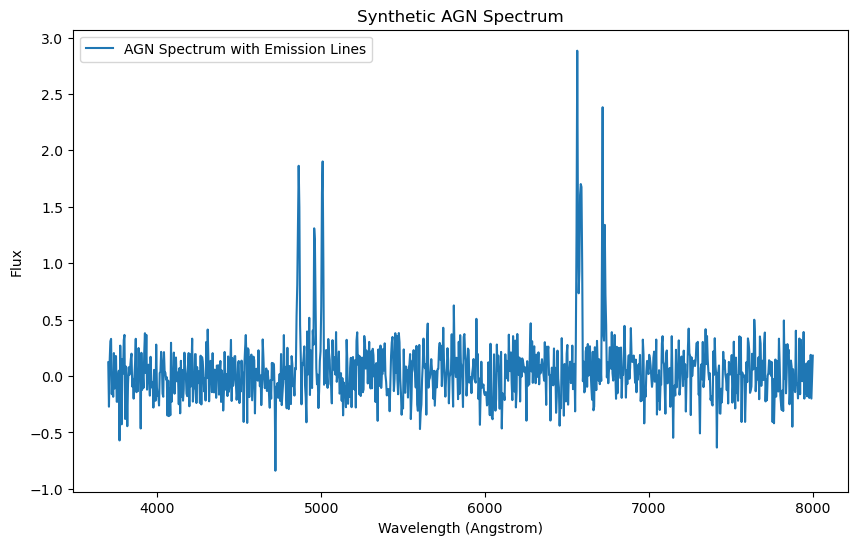

In [35]:
# Step 2
# now I want to add in some typical emission lines for an AGN host galaxies
wavelengths = np.linspace(3700, 8000, 1000)
alpha = -15
flux_continuum = wavelengths ** alpha
# the emission lines include:
# Randomization ranges
width_range = (2, 10)  # Width range in Angstroms
base_height_range = (10, 20)  # Base height range for less intense lines

emission_lines = {
    "H_alpha": {"center": 6563, "element": "H"},
    "H_beta": {"center": 4861, "element": "H"},
    "OIII_5007": {"center": 5007, "element": "O"},
    "OIII_4959": {"center": 4959, "element": "O"},
    "NII_6584": {"center": 6584, "element": "N"},
    "SII_6716": {"center": 6716, "element": "S"},
    "SII_6731": {"center": 6731, "element": "S"}
}


def add_emission_line(wavelength_center, width, height):
    return height * norm.pdf(wavelengths, wavelength_center, width)

for line in emission_lines.values():
    width = random.uniform(*width_range)
    height = random.uniform(*base_height_range)
    
    if line["element"] in ["H", "O", "N"]:
        height *= 1.5

    flux_continuum += add_emission_line(line["center"], width, height)

# Step 3: The spectrum usually also have noise, I also want to include that:
noise_level = 0.2
noise = np.random.normal(0, noise_level, wavelengths.shape)
flux_continuum += noise

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, flux_continuum, label='AGN Spectrum with Emission Lines')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Synthetic AGN Spectrum')
plt.legend()
plt.show()

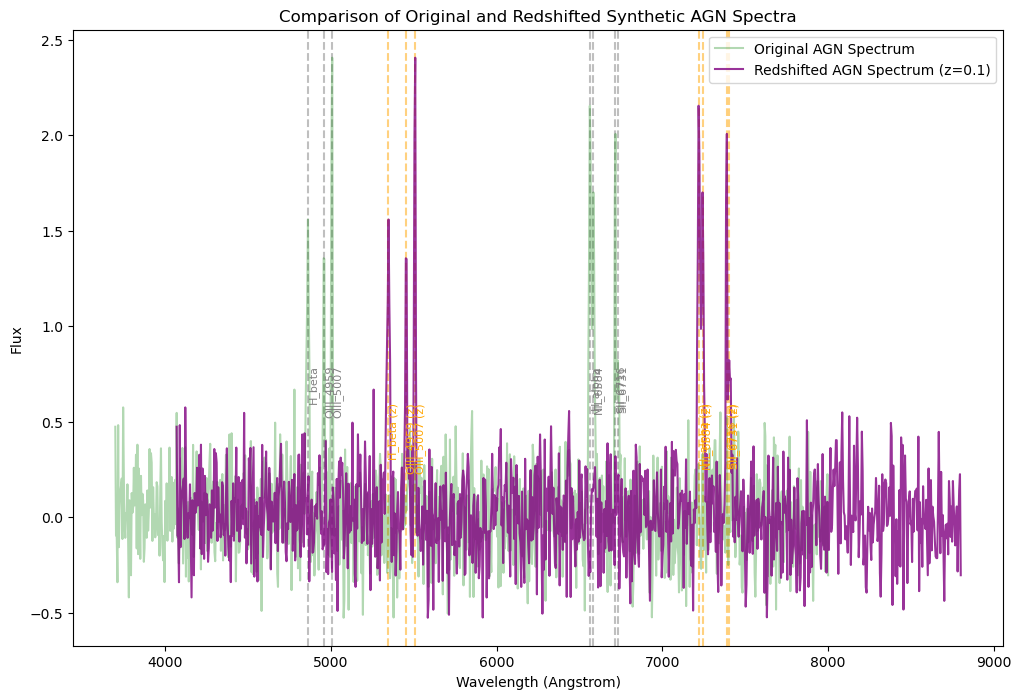

In [36]:
wavelengths = np.linspace(3700, 8000, 1000)
alpha = -15
flux_continuum = wavelengths ** alpha

emission_lines = {
    "H_alpha": {"center": 6563, "element": "H"},
    "H_beta": {"center": 4861, "element": "H"},
    "OIII_5007": {"center": 5007, "element": "O"},
    "OIII_4959": {"center": 4959, "element": "O"},
    "NII_6584": {"center": 6584, "element": "N"},
    "SII_6716": {"center": 6716, "element": "S"},
    "SII_6731": {"center": 6731, "element": "S"}
}

def add_emission_line(wavelength_center, width, height):
    return height * norm.pdf(wavelengths, wavelength_center, width)

width_range = (2, 10)
base_height_range = (10, 20)

for line in emission_lines.values():
    width = random.uniform(*width_range)
    height = random.uniform(*base_height_range)
    if line["element"] in ["H", "O", "N"]:
        height *= 1.5
    flux_continuum += add_emission_line(line["center"], width, height)

noise_level = 0.2
noise = np.random.normal(0, noise_level, wavelengths.shape)
flux_continuum += noise

z = 0.1
original_flux_continuum = flux_continuum.copy()
redshifted_wavelengths = wavelengths * (1 + z)
redshifted_flux_continuum = original_flux_continuum

plt.figure(figsize=(12, 8))
for line_name, line in emission_lines.items():
    original_center = line["center"]
    redshifted_center = original_center * (1 + z)
    plt.axvline(x=original_center, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=redshifted_center, color='orange', linestyle='--', alpha=0.5)
    plt.text(original_center, plt.ylim()[1]*0.8, line_name, rotation=90, verticalalignment='top', fontsize=8, color='gray')
    plt.text(redshifted_center, plt.ylim()[1]*0.6, f'{line_name} (z)', rotation=90, verticalalignment='top', fontsize=8, color='orange')

plt.plot(wavelengths, original_flux_continuum, label='Original AGN Spectrum', color='green', alpha = 0.3)
plt.plot(redshifted_wavelengths, redshifted_flux_continuum, label=f'Redshifted AGN Spectrum (z={z})', color='purple', alpha = 0.8)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Comparison of Original and Redshifted Synthetic AGN Spectra')
plt.legend()
plt.show()

In [41]:
# define a function that takes a single input of redshift and produce the spectra
def generate_redshifted_spectrum(redshift):
    wavelengths = np.linspace(3700, 8000, 1000)
    alpha = -15
    flux_continuum = wavelengths ** alpha

    emission_lines = {
        "H_alpha": {"center": 6563, "element": "H"},
        "H_beta": {"center": 4861, "element": "H"},
        "OIII_5007": {"center": 5007, "element": "O"},
        "OIII_4959": {"center": 4959, "element": "O"},
        "NII_6584": {"center": 6584, "element": "N"},
        "SII_6716": {"center": 6716, "element": "S"},
        "SII_6731": {"center": 6731, "element": "S"}
    }

    def add_emission_line(wavelength_center, width, height):
        return height * norm.pdf(wavelengths, wavelength_center, width)

    width_range = (2, 10)
    base_height_range = (10, 20)

    for line in emission_lines.values():
        width = random.uniform(*width_range)
        height = random.uniform(*base_height_range)
        if line["element"] in ["H", "O", "N"]:
            height *= 1.5
        flux_continuum += add_emission_line(line["center"], width, height)

    noise_level = 0.2
    noise = np.random.normal(0, noise_level, wavelengths.shape)
    flux_continuum += noise

    original_flux_continuum = flux_continuum.copy()
    redshifted_wavelengths = wavelengths * (1 + redshift)
    redshifted_flux_continuum = original_flux_continuum

    plt.figure(figsize=(12, 8))
    for line_name, line in emission_lines.items():
        original_center = line["center"]
        redshifted_center = original_center * (1 + redshift)
        plt.axvline(x=original_center, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=redshifted_center, color='orange', linestyle='--', alpha=0.5)
        plt.text(original_center, plt.ylim()[1]*0.8, line_name, rotation=90, verticalalignment='top', fontsize=8, color='gray')
        plt.text(redshifted_center, plt.ylim()[1]*0.6, f'{line_name} (z)', rotation=90, verticalalignment='top', fontsize=8, color='orange')

    plt.plot(wavelengths, original_flux_continuum, label='Original AGN Spectrum', color='green', alpha=0.3)
    plt.plot(redshifted_wavelengths, redshifted_flux_continuum, label=f'Redshifted AGN Spectrum (z={redshift})', color='purple', alpha=0.8)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux')
    plt.title('Comparison of Original and Redshifted Synthetic AGN Spectra')
    plt.legend()
    plt.show()
    return redshifted_wavelengths, flux_continuum

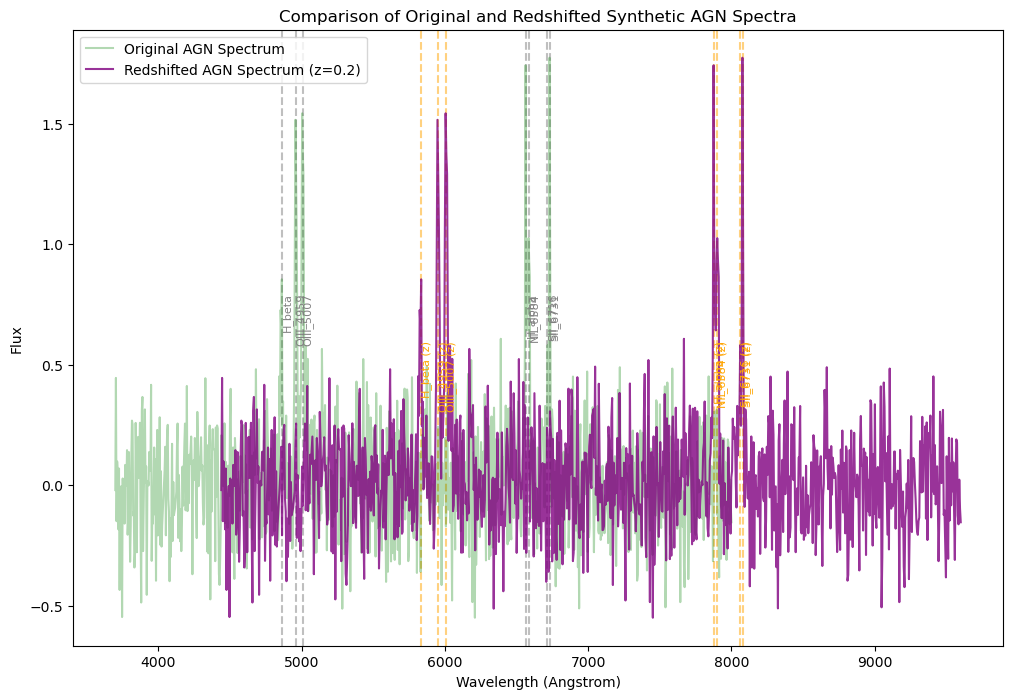

In [38]:
# example
generate_redshifted_spectrum(0.2)

Add this into the class:

In [42]:
class Galaxy:
    '''initialize the galaxy'''
    def __init__(self, mass, position, velocity, black_hole_mass, initial_temperature, redshift):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.black_hole_mass = black_hole_mass
    
    '''black hole accretion model'''
    def calculate_accretion_rate(black_hole_mass, 
                                 rho = np.random.uniform(1e-14, 1e-13), 
                                 v = np.random.uniform(4.5e7, 5.5e7), 
                                 c_s = np.random.uniform(1e6, 2e7)):
        # The input black hole mass should in the unit of solar mass
        G = 6.67430e-11 * u.m**3 / u.kg / u.s**2 # gravitational constant with u.m**3 / u.kg / u.s**2
        M = black_hole_mass * 1.98847e30 * u.kg  # solar masses to kg
        rho = rho * u.kg / u.m**3  # density of the accreting material in kg/m^3
        v = v * u.m / u.s  # relative velocity in m/s
        c_s = c_s * u.m / u.s # sound speed in the material in m/s
        # Bondi-Hoyle-Lyttleton accretion rate
        accretion_rate = (4 * np.pi * G**2 * M**2 * rho) / ((v**2 + c_s**2)**(3/2))
        # Convert accretion rate to solar masses per year
        accretion_rate_solar_masses_per_year = accretion_rate.to(u.kg / u.s) / (1.98847e30 * u.kg) * (60*60*24*365) * u.year
        return accretion_rate_solar_masses_per_year
    
    def calculate_radiation(accretion_rate, epsilon = 0.1):
        # The accretion rate is obtained from the previous function calculate_accretion_rate
        c = 299792458 * u.m / u.s
        # calculate the luminosity (or radiation)
        radiation = epsilon * accretion_rate * 1.98847e30 * c**2  # Convert accretion rate back to kg/s from solar mass
        return radiation
    
    def accretion_model(black_hole_mass, accretion_radius, other_parameters):
        accretion_rate = calculate_accretion_rate(black_hole_mass, accretion_radius, other_parameters)
        radiation = calculate_radiation(accretion_rate, other_parameters)
        jets = determine_jet_production(accretion_rate, radiation, other_parameters)
        return accretion_rate, radiation, jets
    
    '''cooling and heating process in different radius of the galaxy'''
    def heating_function(r, 
                         time, 
                         agn_luminosity_initial = 1e44,
                         star_formation_initial = 2.0,
                         rho_0 = 1e5, 
                         r_0 = 1, 
                         alpha = 1.5):
        decay_factor = 0.05
        star_formation_rate = star_formation_initial / (1 + decay_factor * time)
        agn_luminosity = agn_luminosity_initial / (1 + decay_factor * time)
        density = density_radius(r, rho_0, r_0, alpha)
        new_temp = 1e-35 * (star_formation_rate + agn_luminosity) * density
        return new_temp

    def cooling_function(temperature, r, rho_0 = 1e5, r_0 = 1, alpha = 1.5):
        density = density_radius(r, rho_0, r_0, alpha)
        if temperature < 1e4:
            new_temp = 1e-22 * temperature * density**2
        else:
            new_temp = 1e-24 * temperature**1.5 * density**2
        return new_temp

    def cooling_rate(new_temp, density):
        cooling_rate = new_temp * density**2
        return cooling_rate

    def ism_temperature_evolution(initial_temperature, 
                                  r, 
                                  metallicity, 
                                  star_formation_rate, 
                                  agn_luminosity, timestep, total_time):
        temperature = initial_temperature
        density = density_radius(r, rho_0, r_0, alpha)
        for time in range(total_time):
            # cooling and heating rates
            cooling_rate = cooling_function(temperature, r, rho_0 = 1e5, r_0 = 1, alpha = 1.5) * density**2
            heating_rate = heating_function(star_formation_rate, agn_luminosity, density, time)
            temperature_change = (heating_rate - cooling_rate) * timestep
            temperature += temperature_change
            if temperature < 10:  # 10 K is a reasonable lower limit for ISM temperatures
                temperature = 10
        return temperature

    def ism_temperature_evolution_over_time(initial_temperature, 
                                            r, 
                                            rho_0=1e5, 
                                            r_0=1, 
                                            alpha=1.5, 
                                            metallicity=1.0, 
                                            star_formation_initial=2.0, 
                                            agn_luminosity_initial=1e44, 
                                            timestep=1e3, 
                                            total_time=10000):
        temperature = initial_temperature
        temperatures, cooling_rates, heating_rates = [], [], []
        for time in range(total_time):
            density = density_radius(r, rho_0, r_0, alpha)
            cooling_rate = cooling_function(temperature, r, rho_0, r_0, alpha) * density**2
            heating_rate = heating_function(star_formation_initial, agn_luminosity_initial, r, rho_0, r_0, alpha, time)
            temperature_change = (heating_rate - cooling_rate) * timestep
            temperature += temperature_change
            if temperature < 10:
                temperature = 10
            temperatures.append(temperature)
            cooling_rates.append(cooling_rate)
            heating_rates.append(heating_rate)
        return temperatures, cooling_rates, heating_rates
    
    '''spectra modeling'''
    def generate_redshifted_spectrum(redshift):
        wavelengths = np.linspace(3700, 8000, 1000)
        alpha = -15
        flux_continuum = wavelengths ** alpha

        emission_lines = {
            "H_alpha": {"center": 6563, "element": "H"},
            "H_beta": {"center": 4861, "element": "H"},
            "OIII_5007": {"center": 5007, "element": "O"},
            "OIII_4959": {"center": 4959, "element": "O"},
            "NII_6584": {"center": 6584, "element": "N"},
            "SII_6716": {"center": 6716, "element": "S"},
            "SII_6731": {"center": 6731, "element": "S"}
        }

        def add_emission_line(wavelength_center, width, height):
            return height * norm.pdf(wavelengths, wavelength_center, width)

        width_range = (2, 10)
        base_height_range = (10, 20)

        for line in emission_lines.values():
            width = random.uniform(*width_range)
            height = random.uniform(*base_height_range)
            if line["element"] in ["H", "O", "N"]:
                height *= 1.5
            flux_continuum += add_emission_line(line["center"], width, height)

        noise_level = 0.2
        noise = np.random.normal(0, noise_level, wavelengths.shape)
        flux_continuum += noise

        original_flux_continuum = flux_continuum.copy()
        redshifted_wavelengths = wavelengths * (1 + redshift)
        redshifted_flux_continuum = original_flux_continuum

        plt.figure(figsize=(12, 8))
        for line_name, line in emission_lines.items():
            original_center = line["center"]
            redshifted_center = original_center * (1 + redshift)
            plt.axvline(x=original_center, color='gray', linestyle='--', alpha=0.5)
            plt.axvline(x=redshifted_center, color='orange', linestyle='--', alpha=0.5)
            plt.text(original_center, plt.ylim()[1]*0.8, line_name, rotation=90, verticalalignment='top', fontsize=8, color='gray')
            plt.text(redshifted_center, plt.ylim()[1]*0.6, f'{line_name} (z)', rotation=90, verticalalignment='top', fontsize=8, color='orange')

        plt.plot(wavelengths, original_flux_continuum, label='Original AGN Spectrum', color='green', alpha=0.3)
        plt.plot(redshifted_wavelengths, redshifted_flux_continuum, label=f'Redshifted AGN Spectrum (z={redshift})', color='purple', alpha=0.8)
        plt.xlabel('Wavelength (Angstrom)')
        plt.ylabel('Flux')
        plt.title('Comparison of Original and Redshifted Synthetic AGN Spectra')
        plt.legend()
        plt.show()
        return redshifted_wavelengths, flux_continuum
    
    # Gas Dynamics and Interstellar Medium
    def gas_dynamics(galaxy):
        '''
        This models the impliment model of the dynamics of gas in and around the galaxies
        The processes like cooling, heating, and interaction with AGN radiation should be considered
        '''
        pass
    
    # Galaxy Interaction and Dynamics
    def update_galaxy_dynamics(galaxies):
        '''
        Implement gravitational interactions between galaxies.
        Update positions and velocities based on gravitational forces.
        '''
        pass

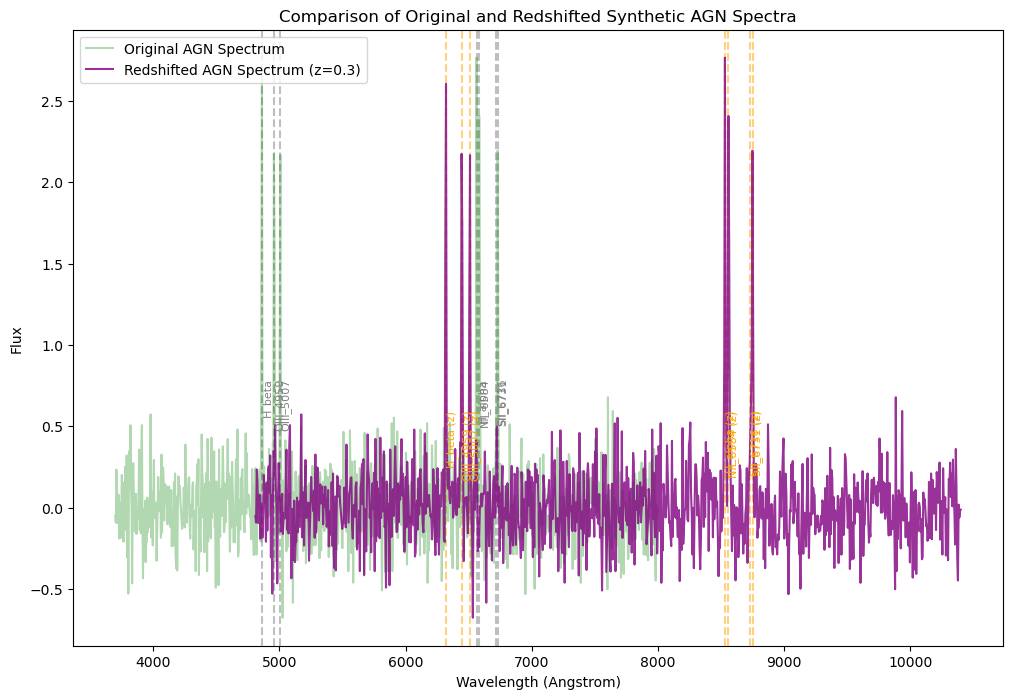

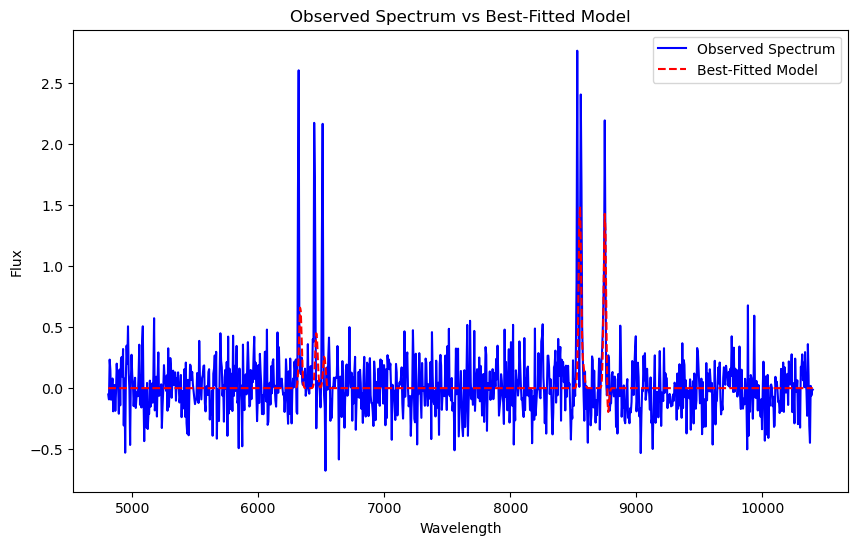

Best fit redshift: 0.30303030303030304
Best fit line intensities: [37.68670118 16.85764465  6.57833353 11.32152371  4.18197575 37.20292448
 -7.59929968]


In [51]:
observed_wavelengths, observed_flux = generate_redshifted_spectrum(0.3)
emission_line_centers = [6563, 4861, 5007, 4959, 6584, 6716, 6731]
line_width = 10

def model_spectrum(wavelengths, redshift, line_intensities):
    model_flux = wavelengths ** -1.5
    for i, line_center in enumerate(emission_line_centers):
        shifted_center = line_center * (1 + redshift)
        model_flux += line_intensities[i] * norm.pdf(wavelengths, shifted_center, line_width)
    return model_flux

def chi_squared(obs_flux, model_flux):
    return np.sum((obs_flux - model_flux) ** 2)

def fit_spectrum(line_intensities, redshift):
    model_flux = model_spectrum(observed_wavelengths, redshift, line_intensities)
    return chi_squared(observed_flux, model_flux)


N = len(emission_line_centers)  # number of emission lines
initial_line_intensities = [10] * N  # Initial guess for each line intensity

# Optimization Model
best_fit = None
for redshift in np.linspace(0, 1, 100):
    result = minimize(fit_spectrum, initial_line_intensities, args=(redshift,))
    if best_fit is None or result.fun < best_fit[1]:
        best_fit = (redshift, result.fun, result.x)

best_fit_flux = model_spectrum(observed_wavelengths, best_fit[0], best_fit[2])

plt.figure(figsize=(10, 6))
plt.plot(observed_wavelengths, observed_flux, label="Observed Spectrum", color='blue')
plt.plot(observed_wavelengths, best_fit_flux, label="Best-Fitted Model", color='red', linestyle='--')
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Observed Spectrum vs Best-Fitted Model")
plt.legend()
plt.show()

print(f"Best fit redshift: {best_fit[0]}")
print(f"Best fit line intensities: {best_fit[2]}")

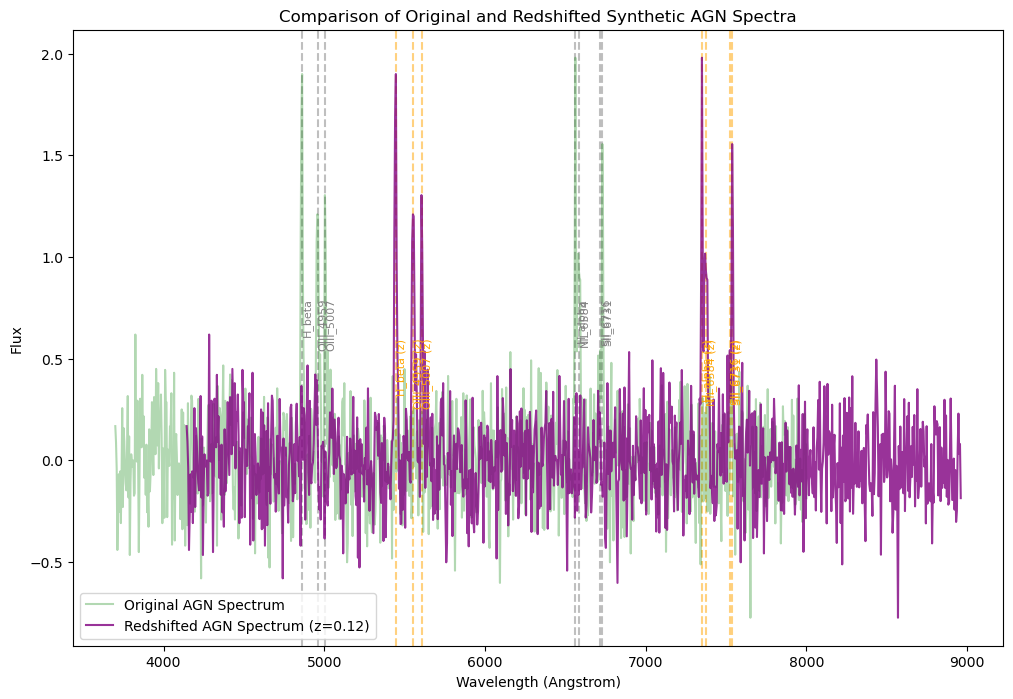

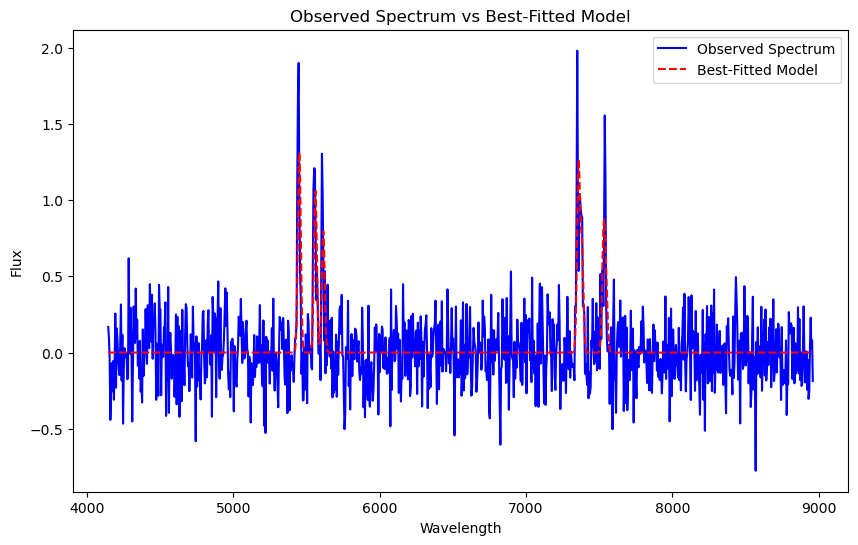

Best fit redshift: 0.12121212121212122
Best fit line intensities: [30.55266864 32.91603416 19.95838356 26.76956041 16.69475791 18.83784394
 10.20122782]


In [53]:
# do another attempt z = 3
observed_wavelengths, observed_flux = generate_redshifted_spectrum(0.12)
emission_line_centers = [6563, 4861, 5007, 4959, 6584, 6716, 6731]
line_width = 10

def model_spectrum(wavelengths, redshift, line_intensities):
    model_flux = wavelengths ** -1.5
    for i, line_center in enumerate(emission_line_centers):
        shifted_center = line_center * (1 + redshift)
        model_flux += line_intensities[i] * norm.pdf(wavelengths, shifted_center, line_width)
    return model_flux

def chi_squared(obs_flux, model_flux):
    return np.sum((obs_flux - model_flux) ** 2)

def fit_spectrum(line_intensities, redshift):
    model_flux = model_spectrum(observed_wavelengths, redshift, line_intensities)
    return chi_squared(observed_flux, model_flux)


N = len(emission_line_centers)  # number of emission lines
initial_line_intensities = [10] * N  # Initial guess for each line intensity

# Optimization Model
best_fit = None
for redshift in np.linspace(0, 1, 100):
    result = minimize(fit_spectrum, initial_line_intensities, args=(redshift,))
    if best_fit is None or result.fun < best_fit[1]:
        best_fit = (redshift, result.fun, result.x)

best_fit_flux = model_spectrum(observed_wavelengths, best_fit[0], best_fit[2])

plt.figure(figsize=(10, 6))
plt.plot(observed_wavelengths, observed_flux, label="Observed Spectrum", color='blue')
plt.plot(observed_wavelengths, best_fit_flux, label="Best-Fitted Model", color='red', linestyle='--')
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Observed Spectrum vs Best-Fitted Model")
plt.legend()
plt.show()

print(f"Best fit redshift: {best_fit[0]}")
print(f"Best fit line intensities: {best_fit[2]}")

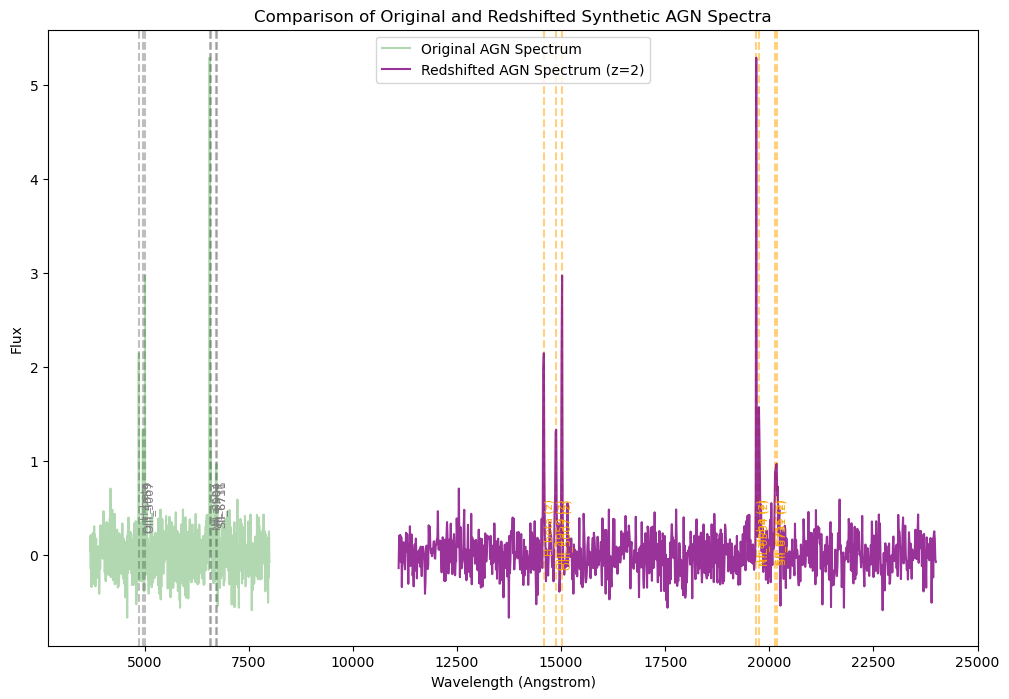

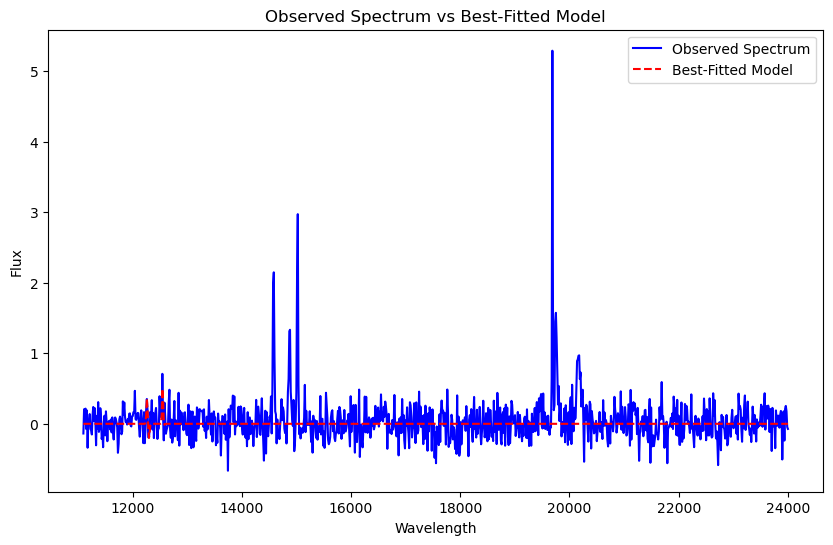

Best fit redshift: 0.8686868686868687
Best fit line intensities: [ 9.25854963 10.         10.         10.         -5.19898144 13.41279921
 -0.44470914]


In [54]:
# this does not work for extremely large z (example z = 2) It cannot be correctly computed
observed_wavelengths, observed_flux = generate_redshifted_spectrum(2)
emission_line_centers = [6563, 4861, 5007, 4959, 6584, 6716, 6731]
line_width = 10

def model_spectrum(wavelengths, redshift, line_intensities):
    model_flux = wavelengths ** -1.5
    for i, line_center in enumerate(emission_line_centers):
        shifted_center = line_center * (1 + redshift)
        model_flux += line_intensities[i] * norm.pdf(wavelengths, shifted_center, line_width)
    return model_flux

def chi_squared(obs_flux, model_flux):
    return np.sum((obs_flux - model_flux) ** 2)

def fit_spectrum(line_intensities, redshift):
    model_flux = model_spectrum(observed_wavelengths, redshift, line_intensities)
    return chi_squared(observed_flux, model_flux)


N = len(emission_line_centers)  # number of emission lines
initial_line_intensities = [10] * N  # Initial guess for each line intensity

# Optimization Model
best_fit = None
for redshift in np.linspace(0, 1, 100):
    result = minimize(fit_spectrum, initial_line_intensities, args=(redshift,))
    if best_fit is None or result.fun < best_fit[1]:
        best_fit = (redshift, result.fun, result.x)

best_fit_flux = model_spectrum(observed_wavelengths, best_fit[0], best_fit[2])

plt.figure(figsize=(10, 6))
plt.plot(observed_wavelengths, observed_flux, label="Observed Spectrum", color='blue')
plt.plot(observed_wavelengths, best_fit_flux, label="Best-Fitted Model", color='red', linestyle='--')
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Observed Spectrum vs Best-Fitted Model")
plt.legend()
plt.show()

print(f"Best fit redshift: {best_fit[0]}")
print(f"Best fit line intensities: {best_fit[2]}")